# RQ 2: How does sentiment correlate with topic, social metrics and demographic variables?

## Resources

In [2]:
# Get Packages & Libraries
library(brms)
library(bayesplot)
library(rethinking)
library(tidyverse)
#library(tidybayes)
library(ggplot2)
library(ggridges)
#library(viridis)
#library(stargazer)
#library(cowplot)
library(patchwork)

In [3]:
# Functions
factorize <- function(df){ # Create a function
  for(i in which(sapply(df, class) == "character")) # that looks for variables with the character class 
      df[[i]] = as.factor(df[[i]]) # and converts them to factor (i.e., categorical) class
  return(df)
}

#unfactorize <- function(df){ # Create a function
#  for(i in which(sapply(df, class) == "factor")) # that looks for variables with the character class 
#      df[[i]] = as.character(df[[i]]) # and converts them to factor (i.e., categorical) class
#  return(df)
#}

st <- function(x){
    (x-mean(x,na.rm=TRUE))/sd(x,na.rm=TRUE)
}

In [4]:
# Get Data
# View Data
df  <- read.csv("20241011_PhD_DiaChk-RQ1b.csv")
#df[df == ''] <- NA #replace blank cells with NA
df <- factorize(df)
glimpse(df)
#colnames(df)
#sum(is.na(df))

Rows: 1,023
Columns: 51
$ docid            <fct> D0002, D0002, D0002, D0002, D0002, D0002, D0002, D000…
$ docyear          <int> 1883, 1883, 1883, 1883, 1883, 1883, 1883, 1883, 1883,…
$ docmonth         <lgl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N…
$ authorName       <fct> Anne F. Richards, Anne F. Richards, Anne F. Richards,…
$ docauthorid      <fct> D0002, D0002, D0002, D0002, D0002, D0002, D0002, D000…
$ authorLocation   <fct> Australia, Australia, Australia, Australia, Australia…
$ authorGender     <fct> F, F, F, F, F, F, F, F, F, F, F, F, F, F, F, F, F, F,…
$ nationalOrigin   <fct> English, English, English, English, English, English,…
$ irish            <fct> False, False, False, False, False, False, False, Fals…
$ otherUK          <fct> True, True, True, True, True, True, True, True, True,…
$ relMin           <fct> False, False, False, False, False, False, False, Fals…
$ catholic         <fct> False, False, False, False, False, False, False, Fals…
$ otherChristian

## Social Metrics

<h4>Single level (completely pooled) model</h4>

$$valence_{ik} \sim \mathrm{Normal}(\mu_{ik}, \sigma)$$

$$\mu_{ik} = \beta_0 +
\beta_1socialMetric.s_i$$

$$\beta_0, \beta_1 \sim \mathrm{Normal}(0,1)$$
$$\sigma \sim \mathrm{Uniform}(0,1)$$ 

https://soci620.netlify.app/slides/soci620_19_covariancePriors.pdf (page 9)

<h4>Multilevel (partial pooling) model with random intercepts</h4>

$$valence_{ik} \sim \mathrm{Normal}(\mu_{ik}, \sigma)$$

$$\mu_{ik} = \beta_{0k} +
\beta_1socialMetric.s_i$$

$$\beta_{0k} = \gamma_0 + \eta_{0k}$$ 
$$\eta_{0k} \sim \mathrm{Normal}(0,\phi_0) $$ 
$$\beta_1 \sim \mathrm{Normal}(0,1)$$
$$\sigma \sim \mathrm{Uniform}(0,1)$$ 
$$\gamma_0 \sim \mathrm{Normal}(0,1)$$
$$\phi_0 \sim \mathrm{Uniform}(0,1) $$


https://soci620.netlify.app/slides/soci620_19_randomIntercepts.pdf (page 6)

<h4>Multilevel (partial pooling) model with random intercepts and slopes</h4>

$$valence_{ik} \sim \mathrm{Normal}(\mu_{ik}, \sigma)$$

$$\mu_{ik} = \beta_{0k} +
\beta_{1k}socialMetric.s_i $$

$$\beta_{0k} = \gamma_{00} + \eta_{0k}$$ 

$$\beta_{1k} = \gamma_{10} + \eta_{1k}$$

$$\left[ \begin{split}\eta_{0k} \\ \eta_{1k}\end{split} \right] \sim \mathrm{MVNormal}\left(\left[ \begin{split}0 \\ 0\\ \end{split} \right], \Phi R \Phi\right)$$

$$\Phi = \begin{bmatrix}\phi_0&0 \\ 0&\phi_1\end{bmatrix}$$

$$\sigma \sim \mathrm{Uniform}(0,1)$$ 
$$\gamma_{00}, \gamma_{10} \sim \mathrm{Normal}(0,1)$$
$$\phi_0,\phi_1 \sim \mathrm{Uniform}(0,1)$$
$$R \sim \mathrm{LKJ}(2)$$

https://soci620.netlify.app/slides/soci620_20_randomSlopes.pdf,
https://soci620.netlify.app/slides/soci620_21_covariancePriors.pdf,
https://soci620.netlify.app/slides/soci620_22_twoLevelModels.pdf

### Social Referencing

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-2.1995 -0.7165 -0.1139  0.0000  0.5835  4.4950 

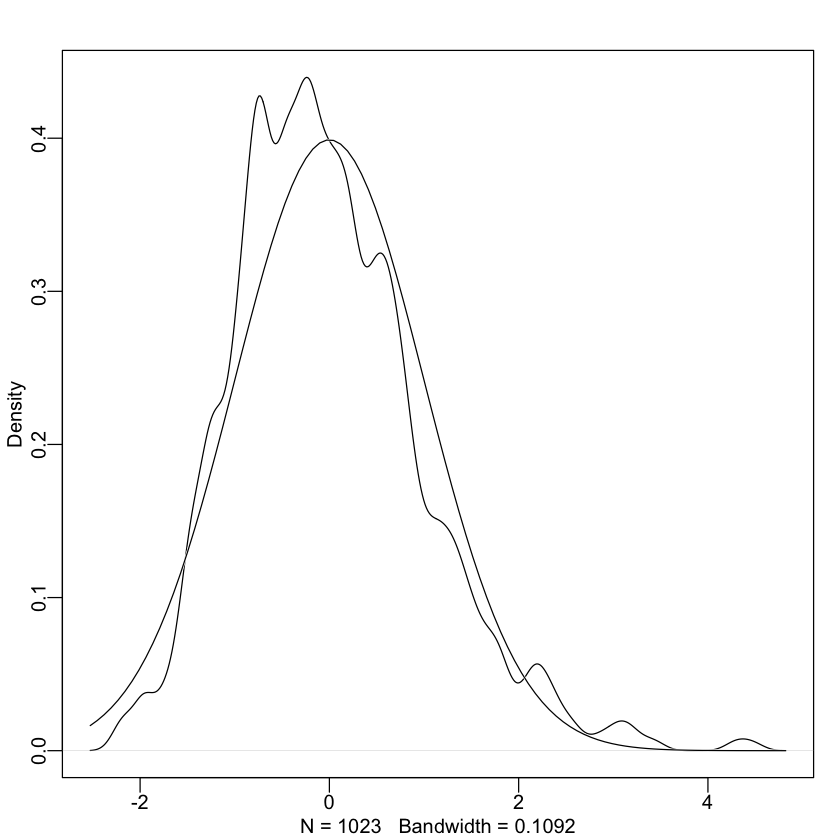

In [5]:
# Transforming variable
df$mentsRate.s <- st(df$mentsRate)
summary(df$mentsRate.s)
dens(df$mentsRate.s, norm.comp = TRUE)

In [6]:
# Single Level

#f4_valSMR_s <- brm(formula= valence ~ 1 + 
#                   mentsRate.s, 
#           family = 'gaussian', 
#           prior=c(set_prior("normal(0,1)",class="Intercept"), # beta_0
#                   set_prior("normal(0,1)", class = "b"), # beta_1 through beta_9
#                   set_prior("uniform(0,1)",class="sigma", ub = 1)), # uncertainty on model
#           data=df, 
#           chains=4, cores=4, iter=2000, warmup = 1000, seed = 4, 
#          file = "20241031_PhD_diaChk_valSMR_s", 
#           control=list(adapt_delta=.99))
#print(f4_valSMR_s)

#Multi Random Intercept

#f5_valSMR_mi <- brm(
#    formula= valence ~ 1 +                    
#                   mentsRate.s + (1 | docauthorid),
#    family = 'gaussian',
#    prior=c(set_prior("normal(0,1)",class="Intercept"),
#            set_prior("normal(0,1)", class = "b"),
#            set_prior("uniform(0,1)",class="sd", ub=1),
#            set_prior("uniform(0,1)",class="sigma", ub=1)),
#    data=df,
#    chains=4, cores=4, iter=2000, warmup = 1000, seed = 4,
#    file = "20241031_PhD_diaChk_valSMR_mi",
#    control=list(adapt_delta=.99)
#)
#print(f5_valSMR_mi)

#Multi Random Intercepts & Random Slopes

#f6_valSMR_mis <- brm(
#    formula= valence ~ 1 +                    
#                   mentsRate.s + (1 +                    
#                   mentsRate.s | docauthorid),
#    family = 'gaussian',
#    prior=c(set_prior("normal(0,1)",class="Intercept"), # gamma_00
#            set_prior("normal(0,1)", class = "b"), # other gammas
#            set_prior("uniform(0,1)",class="sd", ub=1), # within class
#            set_prior("uniform(0,1)",class="sigma", ub=1), # between class
#            set_prior("lkj(2)", class = "cor")),
#    data=df,
#    chains=4, cores=4, iter=2000, warmup = 1000, seed = 4,
#    file = "20241031_PhD_diaChk_valSMR_mis",
#    control=list(adapt_delta=.99)
#)

#print(f6_valSMR_mis)

In [44]:
#Single Level Model
f4_valSMR_s <- readRDS("20241031_PhD_diaChk_valSMR_s.rds")
#print(f4_valSMR_s, prob = .90)

#Multilevel Model - Random Intercepts
f5_valSMR_mi <- readRDS("20241031_PhD_diaChk_valSMR_mi.rds")
#print(f5_valSMR_mi, prob = .90)

#Multilevel Model - Random Intercepts & Random Slopes
f6_valSMR_mis <- readRDS("20241031_PhD_diaChk_valSMR_mis.rds")
print(f6_valSMR_mis, prob = .90)

 Family: gaussian 
  Links: mu = identity; sigma = identity 
Formula: valence ~ 1 + mentsRate.s + (1 + mentsRate.s | docauthorid) 
   Data: df (Number of observations: 1023) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Multilevel Hyperparameters:
~docauthorid (Number of levels: 4) 
                           Estimate Est.Error l-90% CI u-90% CI Rhat Bulk_ESS
sd(Intercept)                  0.43      0.20     0.18     0.83 1.00     1649
sd(mentsRate.s)                0.19      0.17     0.01     0.56 1.00      992
cor(Intercept,mentsRate.s)    -0.18      0.42    -0.80     0.57 1.00     3053
                           Tail_ESS
sd(Intercept)                  1892
sd(mentsRate.s)                1632
cor(Intercept,mentsRate.s)     2458

Regression Coefficients:
            Estimate Est.Error l-90% CI u-90% CI Rhat Bulk_ESS Tail_ESS
Intercept       0.13      0.23    -0.24     0.52 1.00     1377     1806
mentsRate.s    -0.01      0

In [10]:
f4_valSMR_s_i <- add_criterion(f4_valSMR_s, "waic")
f5_valSMR_mi_i <- add_criterion(f5_valSMR_mi, "waic")
f6_valSMR_mis_i <- add_criterion(f6_valSMR_mis, "waic")

w <- loo_compare(f4_valSMR_s_i, f5_valSMR_mi_i, f6_valSMR_mis_i, criterion = "waic")

print(w, simplify = F)

                elpd_diff se_diff elpd_waic se_elpd_waic p_waic  se_p_waic
f6_valSMR_mis_i     0.0       0.0 -1375.7      28.8          7.6     0.6  
f5_valSMR_mi_i     -0.1       0.9 -1375.8      28.9          6.0     0.5  
f4_valSMR_s_i     -27.7       7.2 -1403.4      28.1          3.2     0.3  
                waic    se_waic
f6_valSMR_mis_i  2751.4    57.6
f5_valSMR_mi_i   2751.6    57.8
f4_valSMR_s_i    2806.8    56.2


Saving 7 x 7 in image


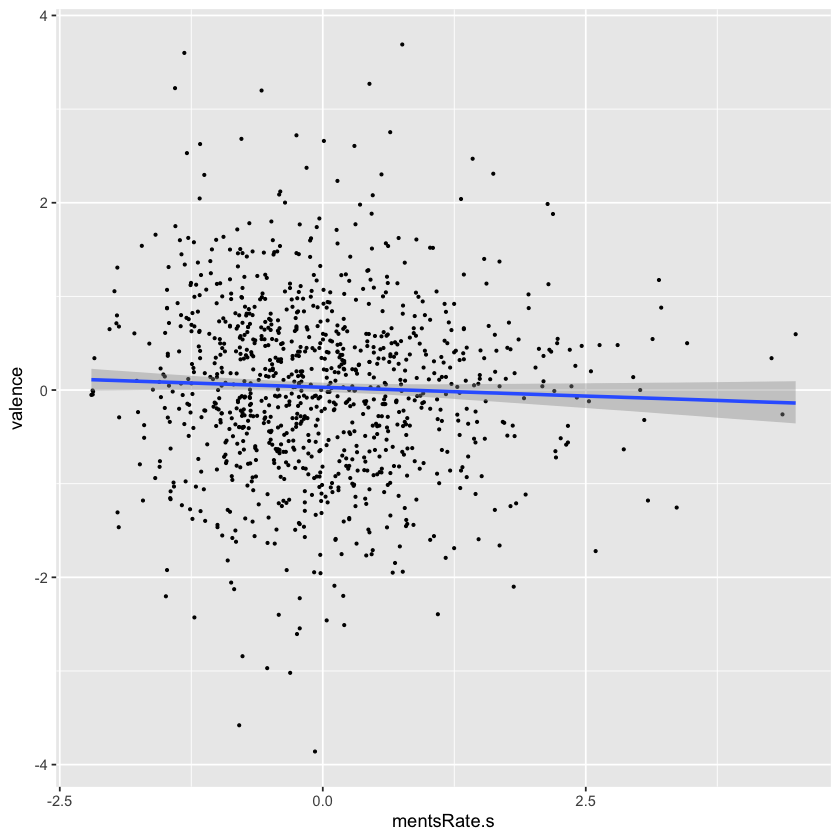

Saving 7 x 7 in image


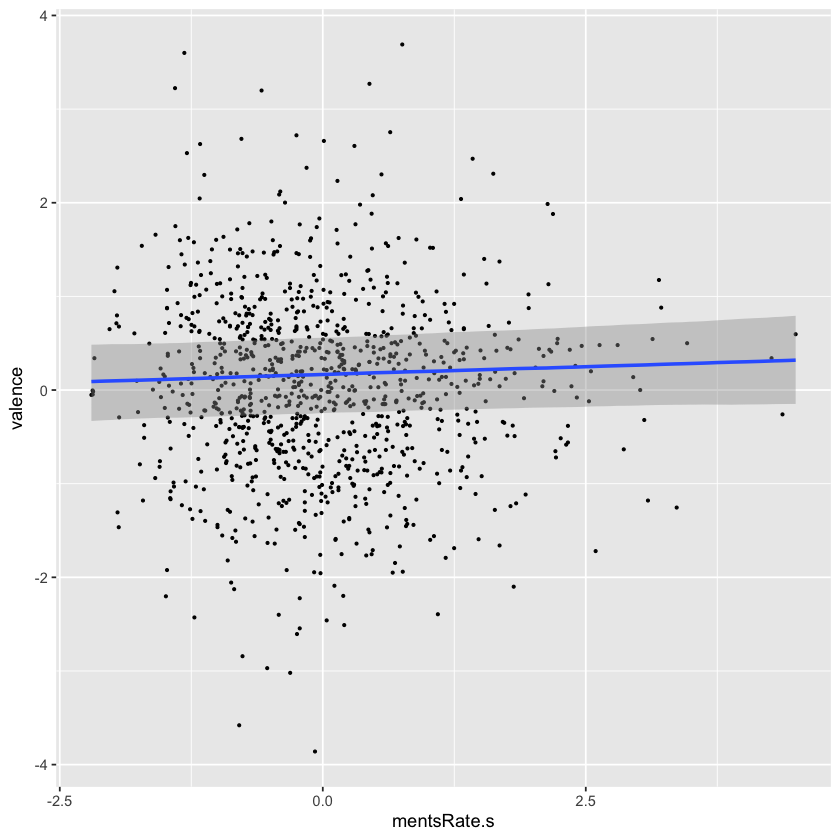

Saving 7 x 7 in image


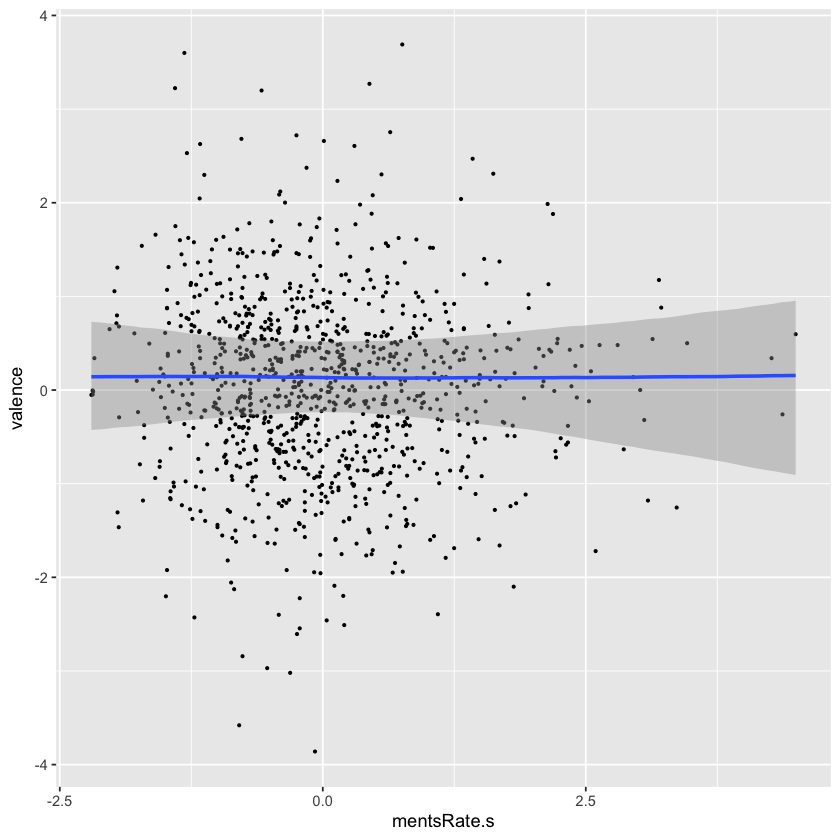

In [59]:
# Fixed Effects

plot(conditional_effects(f4_valSMR_s, prob=.90), points=T, point_args = list(size = .5))
#dev.copy(png,'20240917_PhD_DiaChkSenMenIntFix.png')
#dev.off()
ggsave("20250130_valSMR_s-fixedEffect.jpg")

plot(conditional_effects(f5_valSMR_mi, prob=.90, re_formula=NA), points=T, point_args = list(size = .5))
#dev.copy(png,'20240917_PhD_DiaChkSenMenIntFix.png')
#dev.off()
ggsave("20250130_valSMR_mi-fixedEffect.jpg")

plot(conditional_effects(f6_valSMR_mis, prob=.90, re_formula=NA), points=T, point_args = list(size = .5))
#dev.copy(png,'20240917_PhD_DiaChkSenMenIntFix.png')
#dev.off()
ggsave("20250130_f6_valSMR_mis-fixedEffect.jpg")


Saving 7 x 7 in image


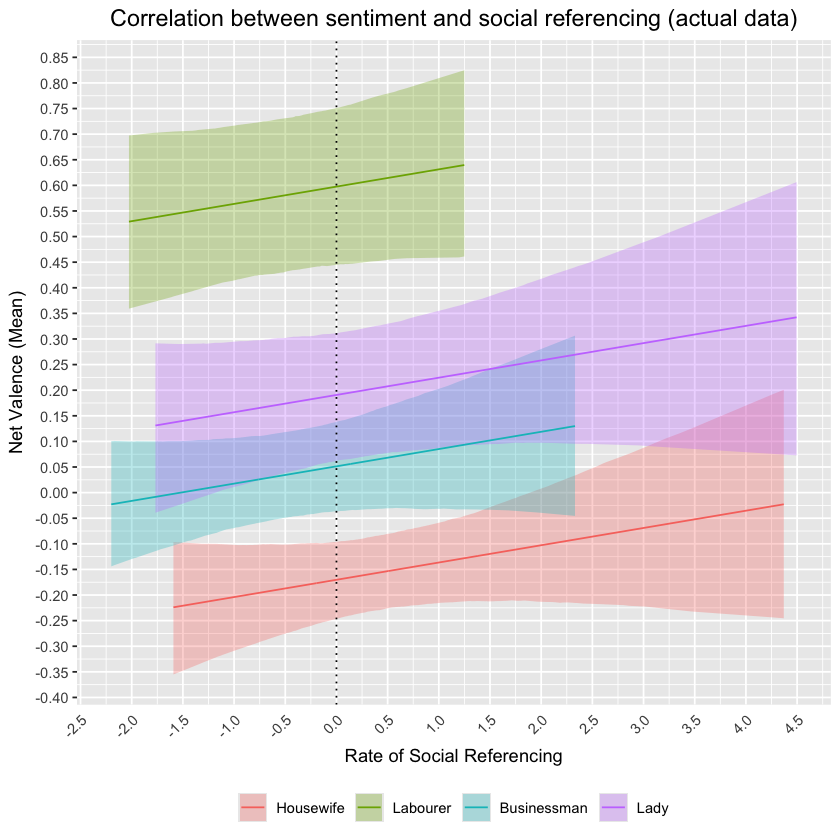

In [60]:
newdata<- df %>% select(mentsRate.s, docauthorid)

f <- fitted(f5_valSMR_mi,
         newdata = newdata,
         probs = c(.05, .95))%>% 
         data.frame() %>% 
         bind_cols(newdata)

f$Author <- NA
f$Author[f$docauthorid=="D0002"] <- "Housewife"
f$Author[f$docauthorid=="D0003"] <- "Labourer"
f$Author[f$docauthorid=="D0007"] <- "Businessman"
f$Author[f$docauthorid=="D0009"] <- "Lady"
f$Author <- as.factor(f$Author)

#f %>% group_by(Author) %>% select(!(c(mentsRate.s, docauthorid))) %>% summarise_all(.funs = min)
#f %>% group_by(Author) %>% select(!(c(mentsRate.s, docauthorid))) %>% summarise_all(.funs = max)

orderAuthor <- c("Housewife", 
                "Labourer", 
                "Businessman", 
                "Lady")

p1 <-
  f %>%
  #ggplot(aes(x = reorder(topic, Estimate), y = Estimate, group = 1)) +
  ggplot(aes(x = mentsRate.s, y = Estimate, group = factor(Author, orderAuthor))) +
  geom_ribbon(aes(ymin = Q5, ymax = Q95, group = factor(Author, orderAuthor), fill = factor(Author, orderAuthor)), alpha = 0.3) +
  geom_line(aes(color = factor(Author, orderAuthor)), alpha=1) +
  theme(legend.title = element_blank(), legend.position = "bottom") +
  ggtitle("Correlation between sentiment and social referencing (actual data)") +
  theme(plot.title = element_text(size = 14, hjust = .5))+
theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1))+
 xlab("Rate of Social Referencing")+ 
ylab("Net Valence (Mean)")+ 
  theme(axis.ticks.x = element_blank())+
scale_y_continuous(breaks=seq(-.40,.85,.05))+
scale_x_continuous(breaks=seq(-2.5,4.5,.5))+
geom_vline(xintercept = 0, linetype="dotted")
p1

ggsave("20250130_valSMR_mi-randomMeans.jpg")

Saving 7 x 7 in image


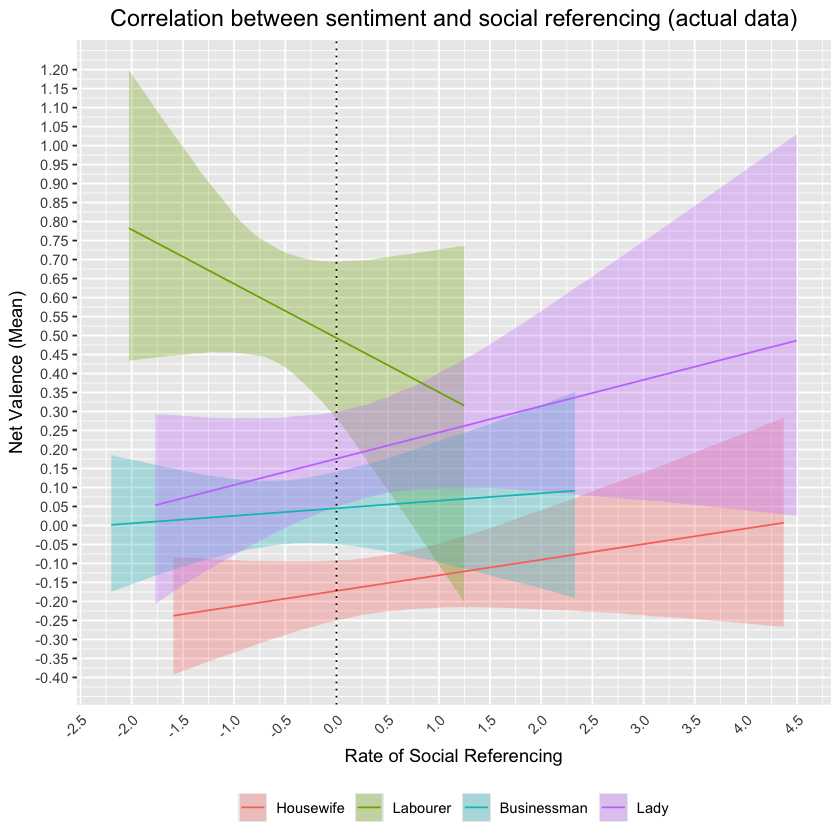

In [61]:
newdata<- df %>% select(mentsRate.s, docauthorid)

f <- fitted(f6_valSMR_mis,
         newdata = newdata,
         probs = c(.05, .95))%>% 
         data.frame() %>% 
         bind_cols(newdata)

f$Author <- NA
f$Author[f$docauthorid=="D0002"] <- "Housewife"
f$Author[f$docauthorid=="D0003"] <- "Labourer"
f$Author[f$docauthorid=="D0007"] <- "Businessman"
f$Author[f$docauthorid=="D0009"] <- "Lady"
f$Author <- as.factor(f$Author)

#f %>% group_by(Author) %>% select(!(c(mentsRate.s, docauthorid))) %>% summarise_all(.funs = min)
#f %>% group_by(Author) %>% select(!(c(mentsRate.s, docauthorid))) %>% summarise_all(.funs = max)

orderAuthor <- c("Housewife", 
                "Labourer", 
                "Businessman", 
                "Lady")

p1 <-
  f %>%
  #ggplot(aes(x = reorder(topic, Estimate), y = Estimate, group = 1)) +
  ggplot(aes(x = mentsRate.s, y = Estimate, group = factor(Author, orderAuthor))) +
  geom_ribbon(aes(ymin = Q5, ymax = Q95, group = factor(Author, orderAuthor), fill = factor(Author, orderAuthor)), alpha = 0.3) +
  geom_line(aes(color = factor(Author, orderAuthor)), alpha=1) +
  theme(legend.title = element_blank(), legend.position = "bottom") +
  ggtitle("Correlation between sentiment and social referencing (actual data)") +
  theme(plot.title = element_text(size = 14, hjust = .5))+
theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1))+
 xlab("Rate of Social Referencing")+ 
ylab("Net Valence (Mean)")+ 
  theme(axis.ticks.x = element_blank())+
scale_y_continuous(breaks=seq(-.40,1.2,.05))+
scale_x_continuous(breaks=seq(-2.5,4.5,.5))+
geom_vline(xintercept = 0, linetype="dotted")
p1

ggsave("20250130_valSMR_mis-randomMeans.jpg")

In [14]:
# Fixed Effects

fe90 <- fixef(f6_valSMR_mis, probs = c(.05,.95))
fe70 <- fixef(f6_valSMR_mis, probs = c(.15,.85))

temp <- data.frame(round(fe90, digits=2))
cbind(temp, round(fe70[,3:4], digits = 2)) %>% rename(Lower90 = Q5, Upper90 = Q95, Lower70 = Q15, Upper70 = Q85)

,Estimate,Est.Error,Lower90,Upper90,Lower70,Upper70
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Intercept,0.13,0.23,-0.24,0.52,-0.08,0.34
mentsRate.s,-0.01,0.13,-0.22,0.16,-0.11,0.08


In [15]:
#Random Effects

cf90 <- coef(f6_valSMR_mis, probs = c(.05,.95))
#str(cf90)
#round(cf90$docauthorid[,,"Intercept"], digits = 2)
#round(cf90$docauthorid[,,"mentsRate.s"], digits = 2)

cf70 <- coef(f6_valSMR_mis, probs = c(.15,.85))
#str(cf70)
#round(cf70$docauthorid[,,"Intercept"], digits = 2)
#round(cf70$docauthorid[,,"mentsRate.s"], digits = 2)

# Combined Tables - Intercepts
temp <- data.frame(round(cf90$docauthorid[,,"Intercept"], digits = 2))
rownames(temp)<- c("Housewife", "Labourer", "Businessman", "Lady")
cols2add <- data.frame(round(cf70$docauthorid[,,"Intercept"], digits = 2))[,3:4]
cbind(temp, cols2add) %>% rename(Lower90 = Q5, Upper90 = Q95, Lower70 = Q15, Upper70 = Q85)

# Combined Tables - Slopes
temp <- data.frame(round(cf90$docauthorid[,,"mentsRate.s"], digits = 2))
rownames(temp)<- c("Housewife", "Labourer", "Businessman", "Lady")
cols2add <- data.frame(round(cf70$docauthorid[,,"mentsRate.s"], digits = 2))[,3:4]
cbind(temp, cols2add) %>% rename(Lower90 = Q5, Upper90 = Q95, Lower70 = Q15, Upper70 = Q85)

,Estimate,Est.Error,Lower90,Upper90,Lower70,Upper70
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Housewife,-0.17,0.05,-0.25,-0.09,-0.22,-0.12
Labourer,0.49,0.13,0.28,0.69,0.36,0.63
Businessman,0.05,0.06,-0.05,0.14,-0.01,0.10
Lady,0.18,0.08,0.05,0.30,0.10,0.25


,Estimate,Est.Error,Lower90,Upper90,Lower70,Upper70
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Housewife,0.04,0.04,-0.03,0.11,0.00,0.08
Labourer,-0.14,0.15,-0.41,0.06,-0.31,0.02
Businessman,0.02,0.06,-0.07,0.11,-0.04,0.08
Lady,0.07,0.07,-0.03,0.19,0.00,0.14


### Self Referencing

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-1.6502 -0.7457 -0.1593  0.0000  0.4797  4.0010 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00000 0.01495 0.02465 0.02728 0.03521 0.09343 

[1] 0.01653195

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00000 0.01495 0.02465 0.02728 0.03521 0.09343 

[1] 0.05207927

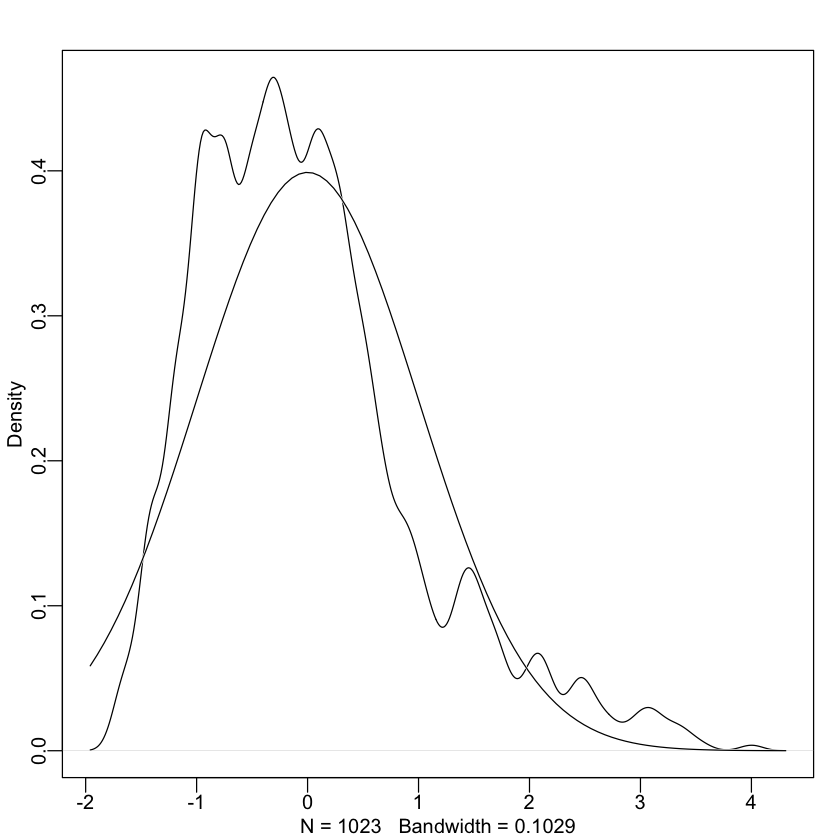

In [6]:
# Transforming variable - All first person pronouns
df$fppAllRate.s <- st(df$fppAllRate)
summary(df$fppAllRate.s)
dens(df$fppAllRate.s, norm.comp = TRUE)

summary(df$fppAllRate)
sd(df$fppAllRate)

# Reverse transformation
summary(sd(df$fppAllRate)*df$fppAllRate.s+mean(df$fppAllRate))

sd(df$fppAllRate)*1.5+mean(df$fppAllRate)

In [38]:
#Multi Random Intercept, FPA

#f7_valFPA_mi <- brm(
#    formula= valence ~ 1 +                    
#                   fppAllRate.s + (1 | docauthorid),
#    family = 'gaussian',
#    prior=c(set_prior("normal(0,1)",class="Intercept"),
#            set_prior("normal(0,1)", class = "b"),
#            set_prior("uniform(0,1)",class="sd", ub=1),
#            set_prior("uniform(0,1)",class="sigma", ub=1)),
#    data=df,
#    chains=4, cores=4, iter=2000, warmup = 1000, seed = 4,
#    file = "20241031_PhD_diaChk_valFPA_mi",
#    control=list(adapt_delta=.99)
#)
#print(f7_valFPA_mi)

#Multi Random Intercepts & Random Slopes

#f8_valFPA_mis <- brm(
#    formula= valence ~ 1 +                    
#                   fppAllRate.s + (1 +                    
#                   fppAllRate.s | docauthorid),
#    family = 'gaussian',
#    prior=c(set_prior("normal(0,1)",class="Intercept"), # gamma_00
#            set_prior("normal(0,1)", class = "b"), # other gammas
#            set_prior("uniform(0,1)",class="sd", ub=1), # within class
#            set_prior("uniform(0,1)",class="sigma", ub=1), # between class
#            set_prior("lkj(2)", class = "cor")),
#    data=df,
#    chains=4, cores=4, iter=2000, warmup = 1000, seed = 4,
#    file = "20241031_PhD_diaChk_valFPA_mis",
#    control=list(adapt_delta=.99)
#)

#print(f8_valFPA_mis)

In [36]:
#Multilevel Model - Random Intercepts
f7_valFPA_mi <- readRDS("20241031_PhD_diaChk_valFPA_mi.rds")
#print(f7_valFPA_mi)

#Multilevel Model - Random Intercepts & Random Slopes
f8_valFPA_mis <- readRDS("20241031_PhD_diaChk_valFPA_mis.rds")
print(f8_valFPA_mis)

 Family: gaussian 
  Links: mu = identity; sigma = identity 
Formula: valence ~ 1 + fppAllRate.s + (1 + fppAllRate.s | docauthorid) 
   Data: df (Number of observations: 1023) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Multilevel Hyperparameters:
~docauthorid (Number of levels: 4) 
                            Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS
sd(Intercept)                   0.43      0.20     0.15     0.92 1.00     1430
sd(fppAllRate.s)                0.21      0.17     0.02     0.70 1.00     1168
cor(Intercept,fppAllRate.s)     0.18      0.41    -0.65     0.87 1.00     2478
                            Tail_ESS
sd(Intercept)                   1661
sd(fppAllRate.s)                1523
cor(Intercept,fppAllRate.s)     2514

Regression Coefficients:
             Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept        0.14      0.23    -0.34     0.62 1.00     1258     1936
fppAllRate.s   

In [20]:
f7_valFPA_mi_i <- add_criterion(f7_valFPA_mi, "waic")
f8_valFPA_mis_i <- add_criterion(f8_valFPA_mis, "waic")

w <- loo_compare(f7_valFPA_mi_i, f8_valFPA_mis_i, criterion = "waic")

print(w, simplify = F)

                elpd_diff se_diff elpd_waic se_elpd_waic p_waic  se_p_waic
f8_valFPA_mis_i     0.0       0.0 -1374.4      28.5          8.6     0.7  
f7_valFPA_mi_i     -1.2       2.3 -1375.6      28.8          6.2     0.5  
                waic    se_waic
f8_valFPA_mis_i  2748.9    57.1
f7_valFPA_mi_i   2751.3    57.6


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-1.4532 -0.7157 -0.2286  0.0000  0.4231  3.8293 

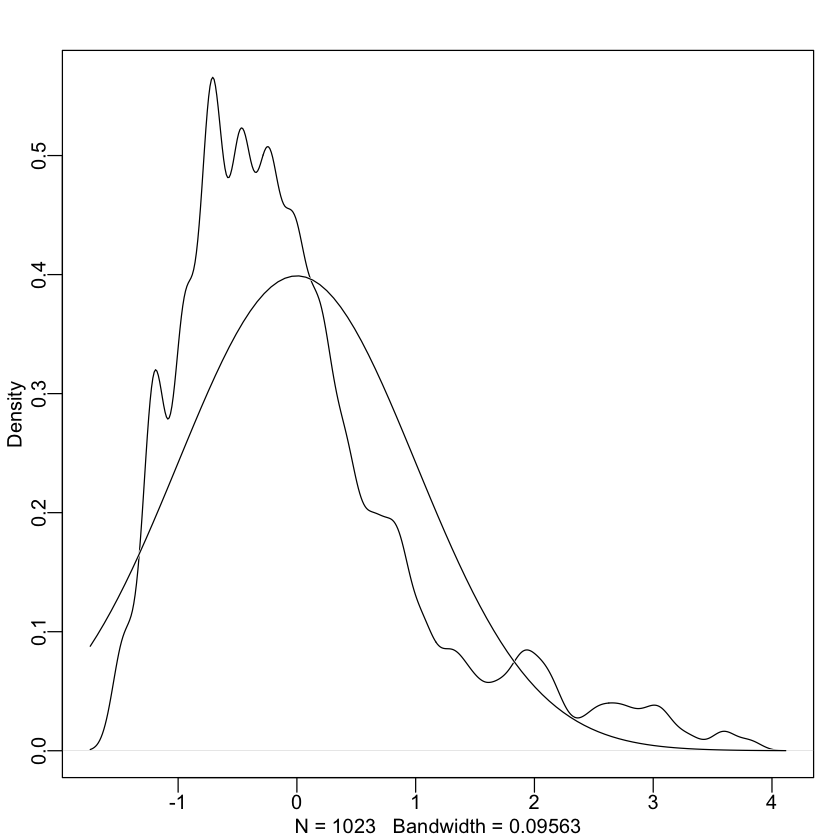

In [21]:
# Transforming variable - first pronouns, subjective only
df$fppSubRate.s <- st(df$fppSubRate)
summary(df$fppSubRate.s)
dens(df$fppSubRate.s, norm.comp = TRUE)

In [23]:
# Multi Random Intercepts only, FPS

#f10_valFPS_mi <- brm(
#    formula= valence ~ 1 +                    
#                   fppSubRate.s + (1 | docauthorid),
#    family = 'gaussian',
#    prior=c(set_prior("normal(0,1)",class="Intercept"),
#            set_prior("normal(0,1)", class = "b"),
#            set_prior("uniform(0,1)",class="sd", ub=1),
#            set_prior("uniform(0,1)",class="sigma", ub=1)),
#    data=df,
#    chains=4, cores=4, iter=2000, warmup = 1000, seed = 4,
#    file = "20250108_PhD_diaChk_valFPS_mi",
#    control=list(adapt_delta=.99)
#)
#print(f7_valFPA_mi)

#Multi Random Intercepts & Random Slopes

#f9_valFPS_mis <- brm(
#    formula= valence ~ 1 +                    
#                   fppSubRate.s + (1 +                    
#                   fppSubRate.s | docauthorid),
#    family = 'gaussian',
#    prior=c(set_prior("normal(0,1)",class="Intercept"), # gamma_00
#            set_prior("normal(0,1)", class = "b"), # other gammas
#            set_prior("uniform(0,1)",class="sd", ub=1), # within class
#            set_prior("uniform(0,1)",class="sigma", ub=1), # between class
#            set_prior("lkj(2)", class = "cor")),
#    data=df,
#    chains=4, cores=4, iter=2000, warmup = 1000, seed = 4,
#    file = "20241031_PhD_diaChk_valFPS_mis",
#    control=list(adapt_delta=.99)
#)

#print(f9_valFPS_mis)

#Multilevel Model - Random Intercepts 
f10_valFPS_mi <- readRDS("20250108_PhD_diaChk_valFPS_mi.rds")
#print(f10_valFPS_mi)

#Multilevel Model - Random Intercepts & Random Slopes
f9_valFPS_mis <- readRDS("20241031_PhD_diaChk_valFPS_mis.rds")
#print(f9_valFPS_mis)

In [24]:
# Two Types of Random Models for first person subjective pronouns

f10_valFPS_mi_i <- add_criterion(f10_valFPS_mi, "waic")
f9_valFPS_mis_i <- add_criterion(f9_valFPS_mis, "waic")

w <- loo_compare(f10_valFPS_mi_i, f9_valFPS_mis_i, criterion = "waic")

print(w, simplify = F)

# Random Intercept & Slopes Models for the Two Types of FPP Variables

f8_valFPA_mis_i <- add_criterion(f8_valFPA_mis, "waic")
f9_valFPS_mis_i <- add_criterion(f9_valFPS_mis, "waic")

w <- loo_compare(f8_valFPA_mis_i, f9_valFPS_mis_i, criterion = "waic")

print(w, simplify = F)

                elpd_diff se_diff elpd_waic se_elpd_waic p_waic  se_p_waic
f9_valFPS_mis_i     0.0       0.0 -1374.6      28.7          8.4     0.7  
f10_valFPS_mi_i    -1.1       2.1 -1375.7      28.9          6.2     0.5  
                waic    se_waic
f9_valFPS_mis_i  2749.2    57.4
f10_valFPS_mi_i  2751.3    57.8
                elpd_diff se_diff elpd_waic se_elpd_waic p_waic  se_p_waic
f8_valFPA_mis_i     0.0       0.0 -1374.4      28.5          8.6     0.7  
f9_valFPS_mis_i    -0.2       1.3 -1374.6      28.7          8.4     0.7  
                waic    se_waic
f8_valFPA_mis_i  2748.9    57.1
f9_valFPS_mis_i  2749.2    57.4


Saving 7 x 7 in image


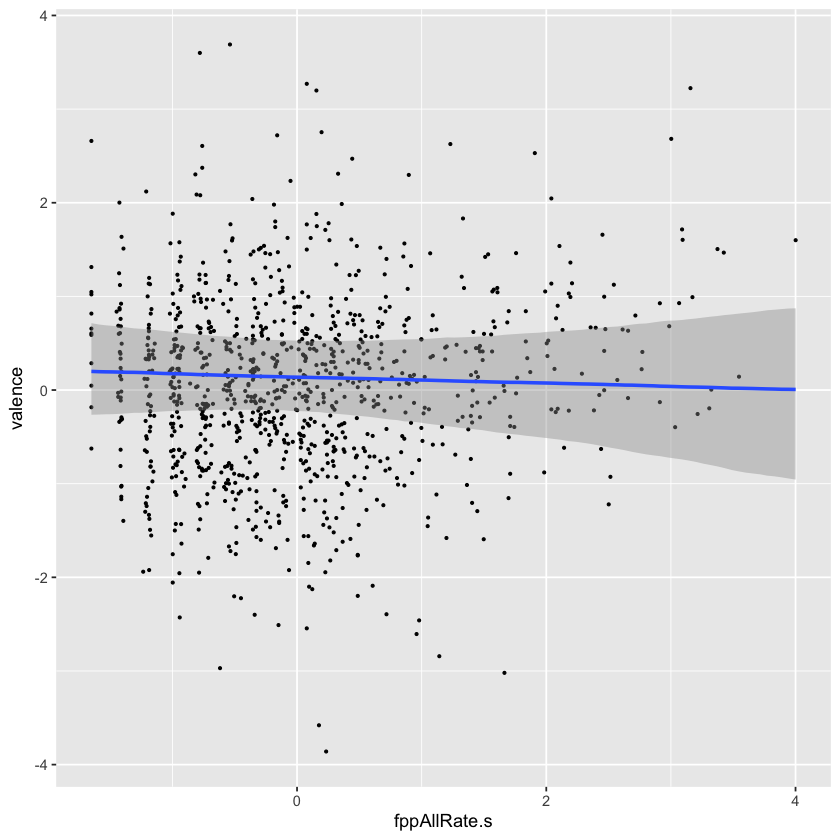

In [41]:
plot(conditional_effects(f8_valFPA_mis, prob=.90, re_formula=NA), points=T, point_args = list(size = .5))
ggsave("20250130_valFPA-fixedEffect.jpg")

Saving 7 x 7 in image


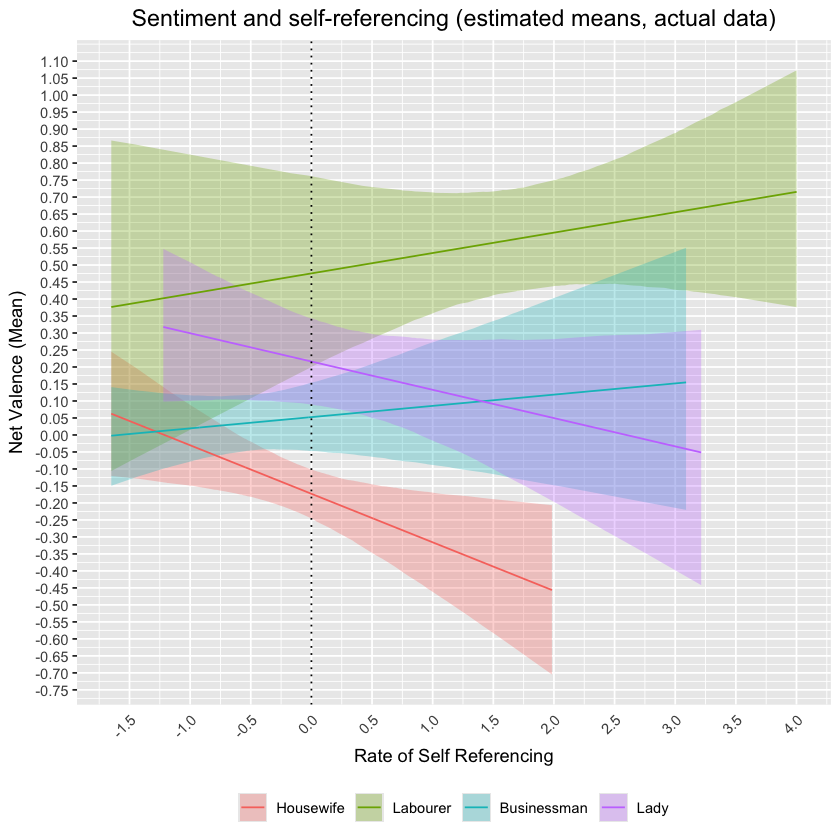

In [39]:
newdata<- df %>% select(fppAllRate.s, docauthorid)

f <- fitted(f8_valFPA_mis,
         newdata = newdata,
         probs = c(.05, .95))%>% 
         data.frame() %>% 
         bind_cols(newdata)

f$Author <- NA
f$Author[f$docauthorid=="D0002"] <- "Housewife"
f$Author[f$docauthorid=="D0003"] <- "Labourer"
f$Author[f$docauthorid=="D0007"] <- "Businessman"
f$Author[f$docauthorid=="D0009"] <- "Lady"
f$Author <- as.factor(f$Author)

#f %>% group_by(Author) %>% select(!(c(fppAllRate.s, docauthorid))) %>% summarise_all(.funs = min)
#f %>% group_by(Author) %>% select(!(c(fppAllRate.s, docauthorid))) %>% summarise_all(.funs = max)

orderAuthor <- c("Housewife", 
                "Labourer", 
                "Businessman", 
                "Lady")

p1 <-
  f %>%
  #ggplot(aes(x = reorder(topic, Estimate), y = Estimate, group = 1)) +
  ggplot(aes(x = fppAllRate.s, y = Estimate, group = factor(Author, orderAuthor))) +
  geom_ribbon(aes(ymin = Q5, ymax = Q95, group = factor(Author, orderAuthor), fill = factor(Author, orderAuthor)), alpha = 0.3) +
  geom_line(aes(color = factor(Author, orderAuthor)), alpha=1) +
  theme(legend.title = element_blank(), legend.position = "bottom") +
  ggtitle("Sentiment and self-referencing (estimated means, actual data)") +
  theme(plot.title = element_text(size = 14, hjust = .5))+
theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1))+
 xlab("Rate of Self Referencing")+ 
ylab("Net Valence (Mean)")+ 
  theme(axis.ticks.x = element_blank())+
scale_y_continuous(breaks=seq(-.8,1.1,.05))+
scale_x_continuous(breaks=seq(-2,4.5,.5))+
geom_vline(xintercept = 0, linetype="dotted")
p1

ggsave("20250130_valFPA-randomMeans.jpg")

In [27]:
# Fixed Effects

fe90 <- fixef(f8_valFPA_mis, probs = c(.05,.95))
fe70 <- fixef(f8_valFPA_mis, probs = c(.15,.85))

temp <- data.frame(round(fe90, digits=2))
cbind(temp, round(fe70[,3:4], digits = 2)) %>% rename(Lower90 = Q5, Upper90 = Q95, Lower70 = Q15, Upper70 = Q85)

,Estimate,Est.Error,Lower90,Upper90,Lower70,Upper70
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Intercept,0.14,0.23,-0.22,0.53,-0.06,0.37
fppAllRate.s,-0.04,0.13,-0.24,0.15,-0.14,0.06


In [28]:
#Random Effects

cf90 <- coef(f8_valFPA_mis, probs = c(.05,.95))
#str(cf90)
#round(cf90$docauthorid[,,"Intercept"], digits = 2)
#round(cf90$docauthorid[,,"fppAllRate.s"], digits = 2)

cf70 <- coef(f8_valFPA_mis, probs = c(.15,.85))
#str(cf70)
#round(cf70$docauthorid[,,"Intercept"], digits = 2)
#round(cf70$docauthorid[,,"fppAllRate.s"], digits = 2)

# Combined Tables - Intercepts
temp <- data.frame(round(cf90$docauthorid[,,"Intercept"], digits = 2))
rownames(temp)<- c("Housewife", "Labourer", "Businessman", "Lady")
cols2add <- data.frame(round(cf70$docauthorid[,,"Intercept"], digits = 2))[,3:4]
cbind(temp, cols2add) %>% rename(Lower90 = Q5, Upper90 = Q95, Lower70 = Q15, Upper70 = Q85)

# Combined Tables - Slopes
temp <- data.frame(round(cf90$docauthorid[,,"fppAllRate.s"], digits = 2))
rownames(temp)<- c("Housewife", "Labourer", "Businessman", "Lady")
cols2add <- data.frame(round(cf70$docauthorid[,,"fppAllRate.s"], digits = 2))[,3:4]
cbind(temp, cols2add) %>% rename(Lower90 = Q5, Upper90 = Q95, Lower70 = Q15, Upper70 = Q85)

,Estimate,Est.Error,Lower90,Upper90,Lower70,Upper70
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Housewife,-0.17,0.04,-0.25,-0.10,-0.22,-0.13
Labourer,0.48,0.17,0.20,0.76,0.30,0.65
Businessman,0.05,0.06,-0.05,0.15,-0.01,0.12
Lady,0.22,0.08,0.09,0.34,0.14,0.30


,Estimate,Est.Error,Lower90,Upper90,Lower70,Upper70
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Housewife,-0.14,0.07,-0.25,-0.03,-0.22,-0.07
Labourer,0.06,0.08,-0.08,0.20,-0.03,0.15
Businessman,0.03,0.06,-0.07,0.14,-0.03,0.10
Lady,-0.08,0.07,-0.21,0.03,-0.16,-0.01


Saving 7 x 7 in image


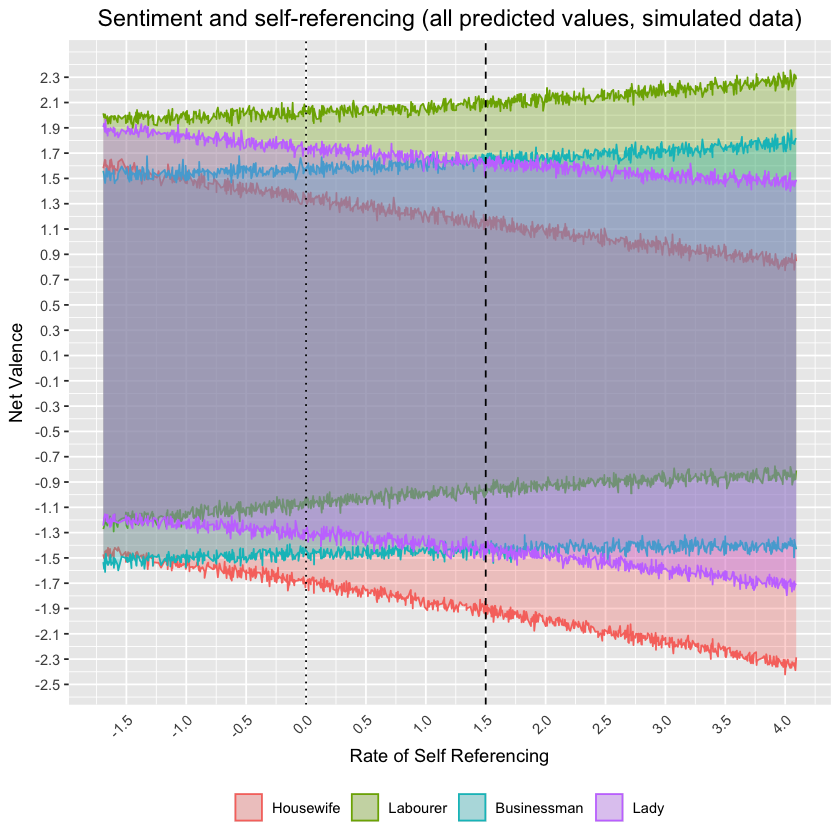

In [38]:
# Projected Means

#nd <- data.frame(fppAllRate.s=rnorm(1000, mean = 0, sd = 1))
nd <- data.frame(fppAllRate.s=runif(1000, min = -1.7, max = 4.1))

housewife <- nd  %>% 
mutate(docauthorid = "D0002")

labourer <- nd  %>% 
mutate(docauthorid = "D0003")

businessman <- nd  %>% 
mutate(docauthorid = "D0007")

lady <- nd  %>% 
mutate(docauthorid = "D0009")

newdata <- rbind(housewife, labourer, businessman, lady)

f <- predict(f8_valFPA_mis,
         newdata = newdata,
         probs = c(.05, .95))%>% 
         data.frame() %>% 
         bind_cols(newdata)

f$Author <- NA
f$Author[f$docauthorid=="D0002"] <- "Housewife"
f$Author[f$docauthorid=="D0003"] <- "Labourer"
f$Author[f$docauthorid=="D0007"] <- "Businessman"
f$Author[f$docauthorid=="D0009"] <- "Lady"
f$Author <- as.factor(f$Author)

#f %>% group_by(Author) %>% select(!(c(fppAllRate.s, docauthorid))) %>% summarise_all(.funs = min)
#f %>% group_by(Author) %>% select(!(c(fppAllRate.s, docauthorid))) %>% summarise_all(.funs = max)
#f %>% group_by(Author) %>% select(!(c(fppAllRate.s, docauthorid)))%>% summarise_all(.funs = mean)

orderAuthor <- c("Housewife", 
                "Labourer", 
                "Businessman", 
                "Lady")

p2 <-
  f %>%
  #ggplot(aes(x = reorder(topic, Estimate), y = Estimate, group = 1)) +
  ggplot(aes(x = fppAllRate.s, y = Estimate, group = factor(Author, orderAuthor))) +
  geom_ribbon(aes(ymin = Q5, ymax = Q95, group = factor(Author, orderAuthor), color = factor(Author, orderAuthor), fill = factor(Author, orderAuthor)), alpha = .3) +
  #geom_line(aes(color = factor(Author, orderAuthor)), alpha=1) +
  theme(legend.title = element_blank(), legend.position = "bottom") +
 ggtitle("Sentiment and self-referencing (all predicted values, simulated data)") +
  theme(plot.title = element_text(size = 14, hjust = .5))+
theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1))+
 xlab("Rate of Self Referencing")+ 
ylab("Net Valence")+ 
  theme(axis.ticks.x = element_blank())+
scale_y_continuous(breaks=seq(-2.5,2.4,.2), )+
scale_x_continuous(breaks=seq(-2,4.5,.5))+
geom_vline(xintercept = 0, linetype="dotted")+
geom_vline(xintercept = 1.5, linetype="dashed")
p2

ggsave("20250130_valFPA-randomPredicts.jpg")

In [30]:
min<- f%>%
select(7, 3, 4)%>%
group_by(Author)%>%
summarise(across(c("Q5", "Q95"), ~ min(.x, na.rm = TRUE)))%>%
column_to_rownames(var = "Author")%>%
rename(minLower = Q5, minUpper = Q95)%>%
t()%>%
as.data.frame()%>%
select(Housewife, Labourer, Businessman, Lady)

#mean<- f%>%
#select(7, 1, 3, 4)%>%
#group_by(Author)%>%
#summarise(across(c("Estimate", "Q5", "Q95"), ~ mean(.x, na.rm = TRUE)))%>%
#column_to_rownames(var = "Author")%>%
#rename(Mean = Estimate)%>%
#t()%>%
#as.data.frame()%>%
#select(Housewife, Labourer, Businessman, Lady)

max<- f%>%
select(7, 3, 4)%>%
group_by(Author)%>%
summarise(across(c("Q5", "Q95"), ~ max(.x, na.rm = TRUE)))%>%
column_to_rownames(var = "Author")%>%
rename(maxLower = Q5, maxUpper = Q95)%>%
t()%>%
as.data.frame()%>%
select(Housewife, Labourer, Businessman, Lady)

combined <- rbind(min, max)
combined <- combined[c(1,4),]
newrow<- t(cbind(colSums(abs(combined))))
new <- rbind(combined, newrow)
new <- round(new, digits = 2)
rownames(new) <- c("Lowest Low", "Highest High", "Range")
new

,Housewife,Labourer,Businessman,Lady
,<dbl>,<dbl>,<dbl>,<dbl>
Lowest Low,-2.41,-1.27,-1.62,-1.80
Highest High,1.67,2.35,1.84,1.95
Range,4.08,3.62,3.46,3.75


## Topics / SWB Factors

In [31]:
#table(df$topicLabel, df$docauthorid)
topicCounts <- df %>% 
  group_by(docauthorid, topicLabel, .drop = FALSE) %>% 
  summarise(n = n(), .groups = 'drop')%>%
pivot_wider(names_from = topicLabel, values_from = n)%>%
t()%>%
data.frame()%>%
rename(Housewife = 1, Labourer = 2, Businessman = 3, Lady = 4)%>%
slice(-1)
as.matrix(topicCounts)

,Housewife,Labourer,Businessman,Lady
01 Housework,131,0,0,4
02 Places,0,0,111,0
03 Business,0,0,100,0
04 Girl Privilege,5,0,0,139
05 Working Boy,2,100,0,5
06 Weather,69,0,2,0
07 People,88,0,1,0
08 Politics,0,0,109,0
09 Outback,91,0,0,2
10 Home,61,2,0,1


In [8]:
# Importing new SWB oriented topic data
df1  <- read.csv("20241104_PhD_Topic2SWB.csv")
#glimpse(df1)

# Creating new variables
vars <- c('SE','HF','SS','RC','GI','LN','UC')
df[vars] <- NA

# Populating with new data
df['SE'][df['topicNumber']==0] <- df1['SE'][df1['Dominant_Topic']==0]
df['HF'][df['topicNumber']==0] <- df1['HF'][df1['Dominant_Topic']==0]
df['SS'][df['topicNumber']==0] <- df1['SS'][df1['Dominant_Topic']==0]
df['RC'][df['topicNumber']==0] <- df1['RC'][df1['Dominant_Topic']==0]
df['SE'][df['topicNumber']==0] <- df1['SE'][df1['Dominant_Topic']==0]
df['GI'][df['topicNumber']==0] <- df1['GI'][df1['Dominant_Topic']==0]
df['LN'][df['topicNumber']==0] <- df1['LN'][df1['Dominant_Topic']==0]
df['UC'][df['topicNumber']==0] <- df1['UC'][df1['Dominant_Topic']==0]

df['SE'][df['topicNumber']==1] <- df1['SE'][df1['Dominant_Topic']==1]
df['HF'][df['topicNumber']==1] <- df1['HF'][df1['Dominant_Topic']==1]
df['SS'][df['topicNumber']==1] <- df1['SS'][df1['Dominant_Topic']==1]
df['RC'][df['topicNumber']==1] <- df1['RC'][df1['Dominant_Topic']==1]
df['SE'][df['topicNumber']==1] <- df1['SE'][df1['Dominant_Topic']==1]
df['GI'][df['topicNumber']==1] <- df1['GI'][df1['Dominant_Topic']==1]
df['LN'][df['topicNumber']==1] <- df1['LN'][df1['Dominant_Topic']==1]
df['UC'][df['topicNumber']==1] <- df1['UC'][df1['Dominant_Topic']==1]

df['SE'][df['topicNumber']==2] <- df1['SE'][df1['Dominant_Topic']==2]
df['HF'][df['topicNumber']==2] <- df1['HF'][df1['Dominant_Topic']==2]
df['SS'][df['topicNumber']==2] <- df1['SS'][df1['Dominant_Topic']==2]
df['RC'][df['topicNumber']==2] <- df1['RC'][df1['Dominant_Topic']==2]
df['SE'][df['topicNumber']==2] <- df1['SE'][df1['Dominant_Topic']==2]
df['GI'][df['topicNumber']==2] <- df1['GI'][df1['Dominant_Topic']==2]
df['LN'][df['topicNumber']==2] <- df1['LN'][df1['Dominant_Topic']==2]
df['UC'][df['topicNumber']==2] <- df1['UC'][df1['Dominant_Topic']==2]

df['SE'][df['topicNumber']==3] <- df1['SE'][df1['Dominant_Topic']==3]
df['HF'][df['topicNumber']==3] <- df1['HF'][df1['Dominant_Topic']==3]
df['SS'][df['topicNumber']==3] <- df1['SS'][df1['Dominant_Topic']==3]
df['RC'][df['topicNumber']==3] <- df1['RC'][df1['Dominant_Topic']==3]
df['SE'][df['topicNumber']==3] <- df1['SE'][df1['Dominant_Topic']==3]
df['GI'][df['topicNumber']==3] <- df1['GI'][df1['Dominant_Topic']==3]
df['LN'][df['topicNumber']==3] <- df1['LN'][df1['Dominant_Topic']==3]
df['UC'][df['topicNumber']==3] <- df1['UC'][df1['Dominant_Topic']==3]

df['SE'][df['topicNumber']==4] <- df1['SE'][df1['Dominant_Topic']==4]
df['HF'][df['topicNumber']==4] <- df1['HF'][df1['Dominant_Topic']==4]
df['SS'][df['topicNumber']==4] <- df1['SS'][df1['Dominant_Topic']==4]
df['RC'][df['topicNumber']==4] <- df1['RC'][df1['Dominant_Topic']==4]
df['SE'][df['topicNumber']==4] <- df1['SE'][df1['Dominant_Topic']==4]
df['GI'][df['topicNumber']==4] <- df1['GI'][df1['Dominant_Topic']==4]
df['LN'][df['topicNumber']==4] <- df1['LN'][df1['Dominant_Topic']==4]
df['UC'][df['topicNumber']==4] <- df1['UC'][df1['Dominant_Topic']==4]

df['SE'][df['topicNumber']==5] <- df1['SE'][df1['Dominant_Topic']==5]
df['HF'][df['topicNumber']==5] <- df1['HF'][df1['Dominant_Topic']==5]
df['SS'][df['topicNumber']==5] <- df1['SS'][df1['Dominant_Topic']==5]
df['RC'][df['topicNumber']==5] <- df1['RC'][df1['Dominant_Topic']==5]
df['SE'][df['topicNumber']==5] <- df1['SE'][df1['Dominant_Topic']==5]
df['GI'][df['topicNumber']==5] <- df1['GI'][df1['Dominant_Topic']==5]
df['LN'][df['topicNumber']==5] <- df1['LN'][df1['Dominant_Topic']==5]
df['UC'][df['topicNumber']==5] <- df1['UC'][df1['Dominant_Topic']==5]

df['SE'][df['topicNumber']==6] <- df1['SE'][df1['Dominant_Topic']==6]
df['HF'][df['topicNumber']==6] <- df1['HF'][df1['Dominant_Topic']==6]
df['SS'][df['topicNumber']==6] <- df1['SS'][df1['Dominant_Topic']==6]
df['RC'][df['topicNumber']==6] <- df1['RC'][df1['Dominant_Topic']==6]
df['SE'][df['topicNumber']==6] <- df1['SE'][df1['Dominant_Topic']==6]
df['GI'][df['topicNumber']==6] <- df1['GI'][df1['Dominant_Topic']==6]
df['LN'][df['topicNumber']==6] <- df1['LN'][df1['Dominant_Topic']==6]
df['UC'][df['topicNumber']==6] <- df1['UC'][df1['Dominant_Topic']==6]

df['SE'][df['topicNumber']==7] <- df1['SE'][df1['Dominant_Topic']==7]
df['HF'][df['topicNumber']==7] <- df1['HF'][df1['Dominant_Topic']==7]
df['SS'][df['topicNumber']==7] <- df1['SS'][df1['Dominant_Topic']==7]
df['RC'][df['topicNumber']==7] <- df1['RC'][df1['Dominant_Topic']==7]
df['SE'][df['topicNumber']==7] <- df1['SE'][df1['Dominant_Topic']==7]
df['GI'][df['topicNumber']==7] <- df1['GI'][df1['Dominant_Topic']==7]
df['LN'][df['topicNumber']==7] <- df1['LN'][df1['Dominant_Topic']==7]
df['UC'][df['topicNumber']==7] <- df1['UC'][df1['Dominant_Topic']==7]

df['SE'][df['topicNumber']==8] <- df1['SE'][df1['Dominant_Topic']==8]
df['HF'][df['topicNumber']==8] <- df1['HF'][df1['Dominant_Topic']==8]
df['SS'][df['topicNumber']==8] <- df1['SS'][df1['Dominant_Topic']==8]
df['RC'][df['topicNumber']==8] <- df1['RC'][df1['Dominant_Topic']==8]
df['SE'][df['topicNumber']==8] <- df1['SE'][df1['Dominant_Topic']==8]
df['GI'][df['topicNumber']==8] <- df1['GI'][df1['Dominant_Topic']==8]
df['LN'][df['topicNumber']==8] <- df1['LN'][df1['Dominant_Topic']==8]
df['UC'][df['topicNumber']==8] <- df1['UC'][df1['Dominant_Topic']==8]

df['SE'][df['topicNumber']==9] <- df1['SE'][df1['Dominant_Topic']==9]
df['HF'][df['topicNumber']==9] <- df1['HF'][df1['Dominant_Topic']==9]
df['SS'][df['topicNumber']==9] <- df1['SS'][df1['Dominant_Topic']==9]
df['RC'][df['topicNumber']==9] <- df1['RC'][df1['Dominant_Topic']==9]
df['SE'][df['topicNumber']==9] <- df1['SE'][df1['Dominant_Topic']==9]
df['GI'][df['topicNumber']==9] <- df1['GI'][df1['Dominant_Topic']==9]
df['LN'][df['topicNumber']==9] <- df1['LN'][df1['Dominant_Topic']==9]
df['UC'][df['topicNumber']==9] <- df1['UC'][df1['Dominant_Topic']==9]

df %>% 
select(all_of(vars), topicLabel) %>% 
unique() %>% 
arrange(topicLabel)

swbCounts <- df %>% 
group_by(docauthorid) %>% 
summarise_at(vars, mean) %>%
mutate(Author = c("Housewife", "Labourer", "Businessman", "Lady"))%>%
select("Author", 2:8)%>%
mutate(across(where(is.numeric), round, 2))%>%
t()
colnames(swbCounts) <- as.character(unlist(swbCounts[1,]))
swbCounts [-1,]

# Standardizing Predictors
vars <- c('SE.s','HF.s','SS.s','RC.s','GI.s', 'LN.s')
df$SE.s <- st(df$SE)
df$HF.s <- st(df$HF)
df$SS.s <- st(df$SS)
df$RC.s <- st(df$RC)
df$GI.s <- st(df$GI)
df$LN.s <- st(df$LN)
df$UC.s <- st(df$UC)

SE,HF,SS,RC,GI,LN,UC,topicLabel
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.05,0.05,0.00,0.00,0.75,0.10,0.05,01 Housework
0.35,0.00,0.30,0.05,0.25,0.00,0.05,02 Places
0.55,0.00,0.25,0.00,0.15,0.00,0.05,03 Business
0.00,0.05,0.35,0.00,0.20,0.25,0.15,04 Girl Privilege
0.25,0.00,0.05,0.05,0.15,0.40,0.10,05 Working Boy
0.00,0.00,0.10,0.00,0.60,0.15,0.15,06 Weather
0.05,0.00,0.40,0.00,0.40,0.00,0.15,07 People
0.60,0.00,0.30,0.00,0.00,0.00,0.10,08 Politics
0.00,0.00,0.10,0.00,0.60,0.10,0.20,09 Outback


,Housewife,Labourer,Businessman,Lady
SE,0.03,0.25,0.49,0.01
HF,0.07,0.01,0.00,0.05
SS,0.14,0.05,0.28,0.33
RC,0.00,0.05,0.02,0.00
GI,0.56,0.15,0.14,0.22
LN,0.08,0.39,0.00,0.25
UC,0.12,0.10,0.07,0.15


<h4>Multilevel (partial pooling) model with random intercepts and slopes - Unclassified included</h4>

$$valence_{ik} \sim \mathrm{Normal}(\mu_{ik}, \sigma)$$

$$\mu_{ik} = \beta_{0k} +
\beta_{1k}SE_i + 
\beta_{2k}HF_i + 
\beta_{3k}SS_i + 
\beta_{4k}RC_i + 
\beta_{5k}GI_i + 
\beta_{6k}LN_i + 
\beta_{7k}UC_i$$

$$\beta_{0k} = \gamma_{00} + \eta_{0k}$$ 

$$\beta_{1k} = \gamma_{10} + \eta_{1k}$$
$$\beta_{2k} = \gamma_{20} + \eta_{2k}$$
$$\beta_{3k} = \gamma_{30} + \eta_{3k}$$
$$\beta_{4k} = \gamma_{40} + \eta_{4k}$$
$$\beta_{5k} = \gamma_{50} + \eta_{5k}$$
$$\beta_{6k} = \gamma_{60} + \eta_{6k}$$
$$\beta_{7k} = \gamma_{70} + \eta_{7k}$$

$$\left[ \begin{split}\eta_{0k} \\ \eta_{1k} \\ \eta_{2k} \\ \eta_{3k} \\ \eta_{4k} \\ \eta_{5k} \\ \eta_{6k}  \\ \eta_{7k}\end{split} \right] \sim \mathrm{MVNormal}\left(\left[ \begin{split}0 \\ 0\\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0\end{split} \right], \Phi R \Phi\right)$$

$$\Phi = \begin{bmatrix}\phi_0&0&0&0&0&0&0&0 \\ 0&\phi_1&0&0&0&0&0&0 \\ 0&0&\phi_2&0&0&0&0&0 \\ 0&0&0&\phi_3&0&0&0&0 \\ 0&0&0&0&\phi_4&0&0&0 \\ 0&0&0&0&0&\phi_5&0&0 \\ 0&0&0&0&0&0&\phi_6&0 \\ 0&0&0&0&0&0&0&\phi_7 \end{bmatrix}$$

$$\sigma \sim \mathrm{Uniform}(0,1)$$ 
$$\gamma_{00},...,\gamma_{70} \sim \mathrm{Normal}(0,1)$$
$$\phi_0,...,\phi_7 \sim \mathrm{Uniform}(0,1)$$
$$R \sim \mathrm{LKJ}(2)$$

<h4>Multilevel (partial pooling) model with random intercepts and slopes - Unclassified excluded</h4>

$$valence_{ik} \sim \mathrm{Normal}(\mu_{ik}, \sigma)$$

$$\mu_{ik} = \beta_{0k} +
\beta_{1k}SE_i + 
\beta_{2k}HF_i + 
\beta_{3k}SS_i + 
\beta_{4k}RC_i + 
\beta_{5k}GI_i + 
\beta_{6k}LN_i$$

$$\beta_{0k} = \gamma_{00} + \eta_{0k}$$ 

$$\beta_{1k} = \gamma_{10} + \eta_{1k}$$
$$\beta_{2k} = \gamma_{20} + \eta_{2k}$$
$$\beta_{3k} = \gamma_{30} + \eta_{3k}$$
$$\beta_{4k} = \gamma_{40} + \eta_{4k}$$
$$\beta_{5k} = \gamma_{50} + \eta_{5k}$$
$$\beta_{6k} = \gamma_{60} + \eta_{6k}$$

$$\left[ \begin{split}\eta_{0k} \\ \eta_{1k} \\ \eta_{2k} \\ \eta_{3k} \\ \eta_{4k} \\ \eta_{5k} \\ \eta_{6k}\end{split} \right] \sim \mathrm{MVNormal}\left(\left[ \begin{split}0 \\ 0\\ 0 \\ 0 \\ 0 \\ 0 \\ 0\end{split} \right], \Phi R \Phi\right)$$

$$\Phi = \begin{bmatrix}\phi_0&0&0&0&0&0&0 \\ 0&\phi_1&0&0&0&0&0 \\ 0&0&\phi_2&0&0&0&0 \\ 0&0&0&\phi_3&0&0&0 \\ 0&0&0&0&\phi_4&0&0 \\ 0&0&0&0&0&\phi_5&0 \\ 0&0&0&0&0&0&\phi_6\end{bmatrix}$$

$$\sigma \sim \mathrm{Uniform}(0,1)$$ 
$$\gamma_{00},...,\gamma_{60} \sim \mathrm{Normal}(0,1)$$
$$\phi_0,...,\phi_6 \sim \mathrm{Uniform}(0,1)$$
$$R \sim \mathrm{LKJ}(2)$$

$$\mathrm{R} = \begin{bmatrix}1&\rho_{01}&\rho_{02}&\rho_{03}&\rho_{04}&\rho_{05}&\rho_{06} \\ {\color{grey}\rho_{\color{grey}{01}}}&1&\rho_{12}&\rho_{13}&\rho_{14}&\rho_{15}&\rho_{16}\\ {\color{grey}\rho_{\color{grey}{02}}}& {\color{grey}\rho_{\color{grey}{12}}}&1&\rho_{23}&\rho_{24}&\rho_{25}&\rho_{26} \\  {\color{grey}\rho_{\color{grey}{03}}}&{\color{grey}\rho_{\color{grey}{13}}}&{\color{grey}\rho_{\color{grey}{23}}}&1&\rho_{34}&\rho_{35}&\rho_{36} \\  {\color{grey}\rho_{\color{grey}{04}}}&{\color{grey}\rho_{\color{grey}{14}}}&{\color{grey}\rho_{\color{grey}{24}}}&{\color{grey}\rho_{\color{grey}{34}}}&1&\rho_{45}&\rho_{46}\\  {\color{grey}\rho_{\color{grey}{05}}}&{\color{grey}\rho_{\color{grey}{15}}}&{\color{grey}\rho_{\color{grey}{25}}}&{\color{grey}\rho_{\color{grey}{35}}}&{\color{grey}\rho_{\color{grey}{45}}}&1&\rho_{56}\\  {\color{grey}\rho_{\color{grey}{06}}}&{\color{grey}\rho_{\color{grey}{16}}}&{\color{grey}\rho_{\color{grey}{26}}}&{\color{grey}\rho_{\color{grey}{36}}}&{\color{grey}\rho_{\color{grey}{46}}}&{\color{grey}\rho_{\color{grey}{56}}}&1\end{bmatrix}$$

https://soci620.netlify.app/slides/soci620_20_randomSlopes.pdf,
https://soci620.netlify.app/slides/soci620_21_covariancePriors.pdf,
https://soci620.netlify.app/slides/soci620_22_twoLevelModels.pdf

In [35]:
#Models - Standardized Variable

#Multi Random Intercepts & Random Slopes - Unclassified included

#f2_valTopSWBst_mis <- brm(
#    formula= valence ~ 1 +                    
#                   SE.s + 
#                   HF.s + 
#                   SS.s + 
#                   RC.s + 
#                   GI.s +
#                   LN.s + 
#                   UC.s + (1 +                    
#                   SE.s + 
#                   HF.s + 
#                   SS.s + 
#                   RC.s +
#                   GI.s +
#                   LN.s + 
#                   UC.s | docauthorid),
#    family = 'gaussian',
#    prior=c(set_prior("normal(0,1)",class="Intercept"), # gamma_00
#            set_prior("normal(0,1)", class = "b"), # other gammas
#            set_prior("uniform(0,1)",class="sd", ub=1), # within class
#            set_prior("uniform(0,1)",class="sigma", ub=1), # between class
#            set_prior("lkj(2)", class = "cor")),
#    data=df,
#    chains=4, cores=4, iter=2000, warmup = 1000, seed = 4,
#    file = "20250116_PhD_diaChk_valTopSWB7_mis",
#    control=list(adapt_delta=.99)
#)

#print(f2_valTopSWBst_mis)

#Multi Random Intercepts & Random Slopes - Unclassified Excluded

#f3_valTopSWBst_mis <- brm(
#    formula= valence ~ 1 +                    
#                   SE.s + 
#                   HF.s + 
#                   SS.s + 
#                   RC.s + 
#                   GI.s +
#                   LN.s + (1 +                    
#                   SE.s + 
#                   HF.s + 
#                   SS.s + 
#                   RC.s +
#                   GI.s +
#                   LN.s | docauthorid),
#    family = 'gaussian',
#    prior=c(set_prior("normal(0,1)",class="Intercept"), # gamma_00
#            set_prior("normal(0,1)", class = "b"), # other gammas
#            set_prior("uniform(0,1)",class="sd", ub=1), # within class
#            set_prior("uniform(0,1)",class="sigma", ub=1), # between class
#            set_prior("lkj(2)", class = "cor")),
#    data=df,
#    chains=4, cores=4, iter=2000, warmup = 1000, seed = 4,
#    file = "20250116_PhD_diaChk_valTopSWB_mis",
#    control=list(adapt_delta=.99)
#)

#print(f3_valTopSWBst_mis)

#multi Random Intercepts & Random Slopes - Unclassified Included
f2_valTopSWBst_mis <- readRDS("20250116_PhD_diaChk_valTopSWB7_mis.rds")
#print(f2_valTopSWBst_mis, prob = .90)

#Multi Random Intercepts & Random Slopes - Unclassified Excluded
f3_valTopSWBst_mis <- readRDS("20250116_PhD_diaChk_valTopSWB_mis.rds")
#print(f3_valTopSWBst_mis, prob = .90)

In [15]:
#Models - Unstandardized Variables

#Multi Random Intercepts & Random Slopes - Unclassified included

#f2_valTopSWB_mis <- brm(
#    formula= valence ~ 1 +                    
#                   SE + 
#                   HF + 
#                  SS + 
#                   RC + 
#                   GI +
#                   LN + 
#                   UC + (1 +                    
#                  SE + 
#                   HF + 
#                   SS + 
#                   RC +
#                   GI +
#                   LN + 
#                   UC | docauthorid),
#    family = 'gaussian',
#    prior=c(set_prior("normal(0,1)",class="Intercept"), # gamma_00
#            set_prior("normal(0,1)", class = "b"), # other gammas
#            set_prior("uniform(0,1)",class="sd", ub=1), # within class
#            set_prior("uniform(0,1)",class="sigma", ub=1), # between class
#            set_prior("lkj(2)", class = "cor")),
#    data=df,
#    chains=4, cores=4, iter=2000, warmup = 1000, seed = 4,
#    file = "20250117_PhD_diaChk_valTopSWB7_mis",
#    control=list(adapt_delta=.99)
#)

#print(f2_valTopSWB_mis)

#Multi Random Intercepts & Random Slopes - Unclassified Excluded

#f3_valTopSWB_mis <- brm(
#    formula= valence ~ 1 +                    
#                   SE + 
#                   HF + 
#                  SS + 
#                   RC + 
#                   GI +
#                   LN + (1 +                    
#                   SE + 
#                   HF + 
#                   SS + 
#                   RC +
#                   GI +
#                  LN | docauthorid),
#    family = 'gaussian',
#    prior=c(set_prior("normal(0,1)",class="Intercept"), # gamma_00
#            set_prior("normal(0,1)", class = "b"), # other gammas
#            set_prior("uniform(0,1)",class="sd", ub=1), # within class
#            set_prior("uniform(0,1)",class="sigma", ub=1), # between class
#            set_prior("lkj(2)", class = "cor")),
#    data=df,
#    chains=4, cores=4, iter=2000, warmup = 1000, seed = 4,
#    file = "20250117_PhD_diaChk_valTopSWB_mis",
#    control=list(adapt_delta=.99)
#)

#print(f3_valTopSWB_mis)

#Unstandardized

#multi Random Intercepts & Random Slopes - Unclassified Included
f2_valTopSWB_mis <- readRDS("20250117_PhD_diaChk_valTopSWB7_mis.rds")
#print(f2_valTopSWB_mis, prob = .90)

#Multi Random Intercepts & Random Slopes - Unclassified Excluded
f3_valTopSWB_mis <- readRDS("20250117_PhD_diaChk_valTopSWB_mis.rds")
print(f3_valTopSWB_mis, prob = .90)

 Family: gaussian 
  Links: mu = identity; sigma = identity 
Formula: valence ~ 1 + SE + HF + SS + RC + GI + LN + (1 + SE + HF + SS + RC + GI + LN | docauthorid) 
   Data: df (Number of observations: 1023) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Multilevel Hyperparameters:
~docauthorid (Number of levels: 4) 
                  Estimate Est.Error l-90% CI u-90% CI Rhat Bulk_ESS Tail_ESS
sd(Intercept)         0.46      0.25     0.07     0.90 1.00     1904     1850
sd(SE)                0.48      0.29     0.05     0.94 1.00     3796     2370
sd(HF)                0.55      0.29     0.07     0.96 1.00     2998     2393
sd(SS)                0.44      0.28     0.04     0.93 1.00     4031     2663
sd(RC)                0.51      0.29     0.05     0.96 1.00     4558     2184
sd(GI)                0.54      0.28     0.08     0.95 1.00     2585     2706
sd(LN)                0.49      0.28     0.06     0.94 1.00     3779     28

In [37]:
f2_valTopSWB_mis_i <- add_criterion(f2_valTopSWB_mis, "waic") # UC inclusive (7)
f3_valTopSWB_mis_i <- add_criterion(f3_valTopSWB_mis, "waic") # UC exclusive (6)
f2_valTopSWBst_mis_i <- add_criterion(f2_valTopSWBst_mis, "waic") # UC inclusive (7)
f3_valTopSWBst_mis_i <- add_criterion(f3_valTopSWBst_mis, "waic") # UC exclusive (6)
w <- loo_compare(f2_valTopSWB_mis_i, f3_valTopSWB_mis_i,f2_valTopSWBst_mis_i, f3_valTopSWBst_mis_i, criterion = "waic")
round(w, digits = 2)

,elpd_diff,se_diff,elpd_waic,se_elpd_waic,p_waic,se_p_waic,waic,se_waic
f2_valTopSWB_mis_i,0.00,0.00,-1376.77,29.19,13.85,2.40,2753.53,58.38
f3_valTopSWB_mis_i,-0.15,0.59,-1376.92,29.20,13.38,2.51,2753.84,58.41
f3_valTopSWBst_mis_i,-1.02,4.10,-1377.79,28.89,20.33,4.20,2755.57,57.79
f2_valTopSWBst_mis_i,-1.41,4.03,-1378.17,28.97,22.09,4.78,2756.35,57.94


Saving 7 x 7 in image


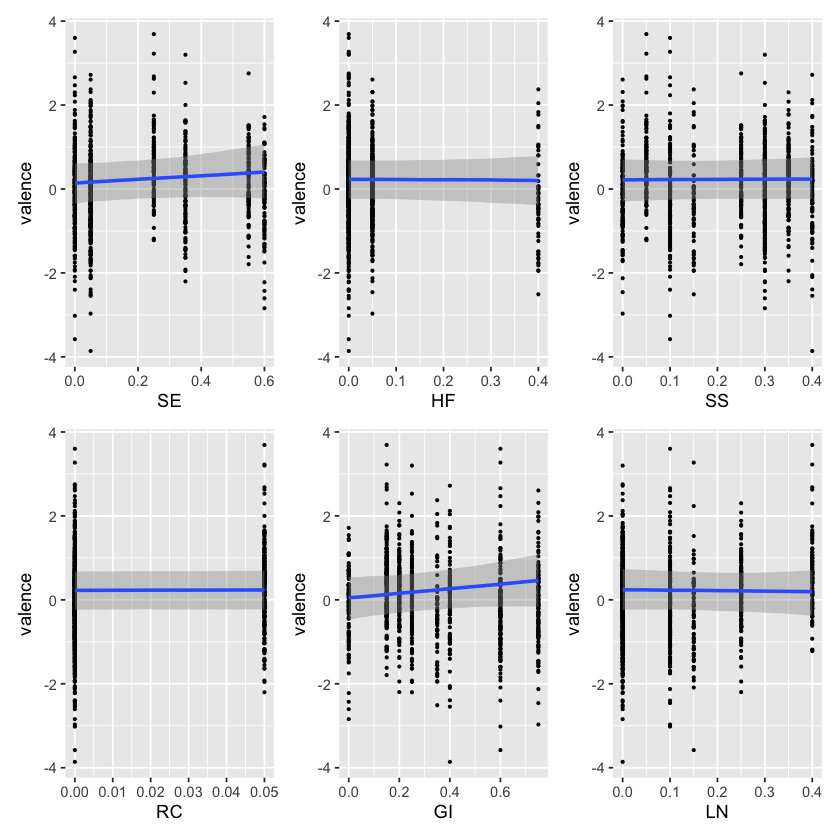

In [34]:
p <- conditional_effects(f3_valTopSWB_mis, prob=.90, re_formula=NA)
pSE <- plot(p, points=T, plot = F, point_args = list(size = .5))[[1]]
pHF <- plot(p, points=T, plot = F, point_args = list(size = .5))[[2]]
pSS <- plot(p, points=T, plot = F, point_args = list(size = .5))[[3]]
pRC <- plot(p, points=T, plot = F, point_args = list(size = .5))[[4]]
pGI <- plot(p, points=T, plot = F, point_args = list(size = .5))[[5]]
pLN <- plot(p, points=T, plot = F, point_args = list(size = .5))[[6]]

composite <- pSE + pHF + pSS + pRC + pGI + pLN
composite
ggsave("20250130_valTopSWB-fixedEffects.jpg")

In [39]:
#Unstandardized

#“Intercept” refers to the centered intercept, that is, when all standard predictors (fixed effects) have mean zero.  The centering happens internally inside Stan to speed up computation and has no user visible effects otherwise"
#https://discourse.mc-stan.org/t/b-intercept-and-intercept-how-are-they-related/12933
# b_intercept is what should be used for interpretation.

#ps <- posterior_summary(f3_valTopSWB_mis,probs = c(.05, .95)) %>% round(digits = 3)
#ps <- posterior_summary(f3_valTopSWB_mis,probs = c(.15, .85)) %>% round(digits = 2)
#print(ps)

# Fixed Effects

fe90 <- fixef(f3_valTopSWB_mis, probs = c(.05,.95))
fe70 <- fixef(f3_valTopSWB_mis, probs = c(.15,.85))

temp <- data.frame(round(fe90, digits=2))
cbind(temp, round(fe70[,3:4], digits = 2)) %>% rename(Lower90 = Q5, Upper90 = Q95, Lower70 = Q15, Upper70 = Q85)


,Estimate,Est.Error,Lower90,Upper90,Lower70,Upper70
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Intercept,-0.05,0.45,-0.81,0.68,-0.52,0.42
SE,0.45,0.59,-0.51,1.41,-0.16,1.06
HF,-0.06,0.60,-1.01,0.95,-0.67,0.56
SS,0.07,0.61,-0.93,1.07,-0.55,0.72
RC,0.18,0.96,-1.44,1.75,-0.83,1.21
GI,0.55,0.54,-0.32,1.45,0.00,1.11
LN,-0.17,0.73,-1.38,1.03,-0.93,0.58


Saving 7 x 7 in image


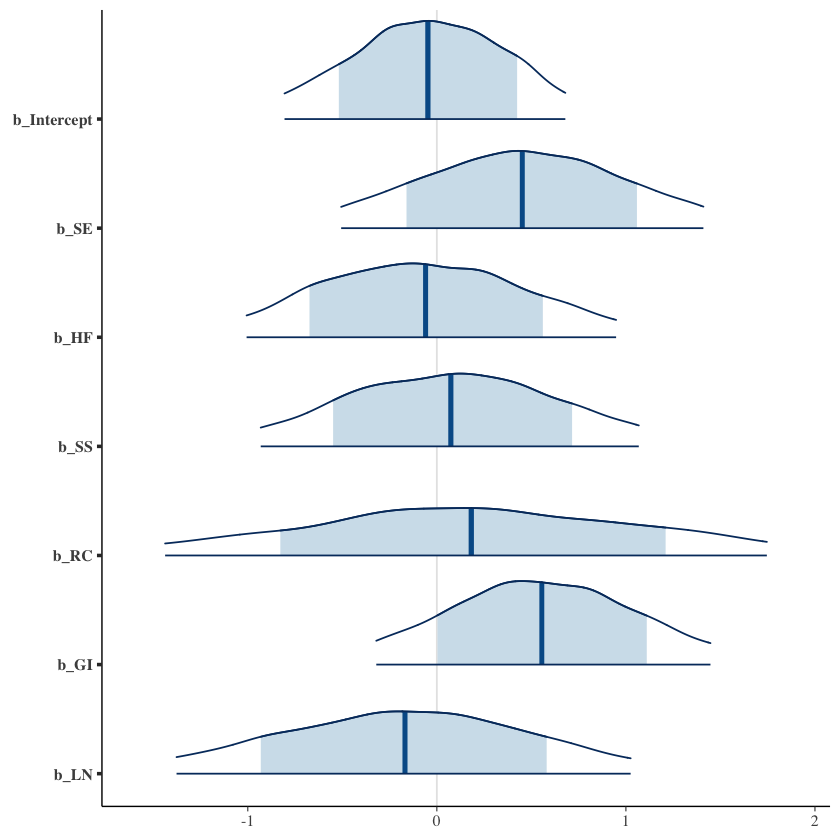

In [31]:
#mcmc_plot(f3_valTopSWB_mis, variable = "^b_", regex = TRUE, prob = 0.7, prob_outer = 0.9, outer_size = 0.5)
p <- mcmc_areas(f3_valTopSWB_mis, regex_pars = "^b_", prob = 0.7, prob_outer = 0.9, point_est = "mean")
p
ggsave("20250130_valTopSWB-fixedCCs.jpg")

Picking joint bandwidth of 0.101

Saving 7 x 7 in image
Picking joint bandwidth of 0.101



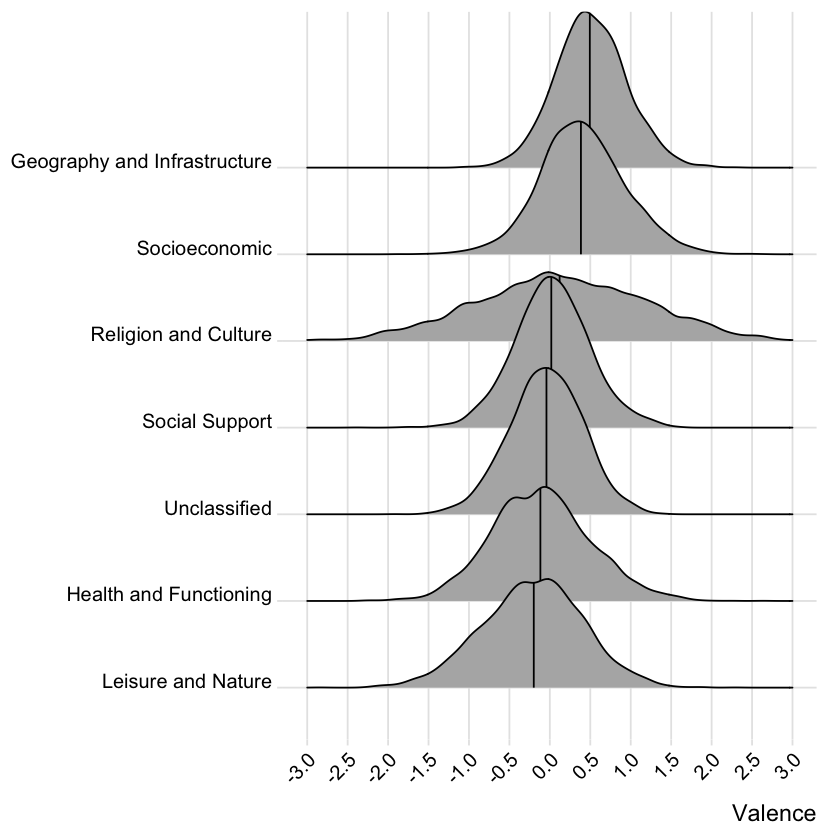

In [32]:
nd <- data.frame(SE=c(0,1,0,0,0,0,0),
                HF=c(0,0,1,0,0,0,0),
                SS=c(0,0,0,1,0,0,0),
                RC=c(0,0,0,0,1,0,0),
                GI=c(0,0,0,0,0,1,0),
                LN=c(0,0,0,0,0,0,1))

# Means

f <- data.frame(fitted(f3_valTopSWB_mis, 
                       re_formula = NA,
         newdata = nd,
         probs = c(.05, .95), 
         summary = F))

colnames(f) <- c("Unclassified",
                 "Socioeconomic", 
                 "Health and Functioning", 
                 "Social Support", 
                 "Religion and Culture", 
                 "Geography and Infrastructure", 
                 "Leisure and Nature")

#fixed <- f[,-1]
fixed <- f

fixed <- fixed %>%                                   
  gather(variable, value)

ggplot(fixed, aes(x = value, y = reorder(variable, value))) + # Descending order of mean valence
stat_density_ridges(quantile_lines = TRUE, quantiles = 2, from = -3, to = 3)+
#geom_density_ridges() +
  theme_ridges() +
  theme(legend.position = "none", axis.title.y= element_blank()) + 
xlab("Valence")+
scale_x_continuous(breaks=seq(-3,3,.5))+
theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1))+ 
ylab("Net Valence (Mean)")

ggsave("20250130_valTopSWB-fixedMeans.jpg")

In [22]:
nd <- data.frame(SE=c(0,1,0,0,0,0,0),
                HF=c(0,0,1,0,0,0,0),
                SS=c(0,0,0,1,0,0,0),
                RC=c(0,0,0,0,1,0,0),
                GI=c(0,0,0,0,0,1,0),
                LN=c(0,0,0,0,0,0,1))

f <- data.frame(fitted(f3_valTopSWB_mis, 
                       re_formula = NA,
         newdata = nd,
         probs = c(.05, .95), 
         summary = T))

row.names(f)<- c("Unclassified",
                 "Socioeconomic", 
                 "Health and Functioning", 
                 "Social Support", 
                 "Religion and Culture", 
                 "Geography and Infrastructure", 
                 "Leisure and Nature")

f<- f %>% arrange(desc(Estimate))
#f<- f[-5,]
round(f, digits=2)

,Estimate,Est.Error,Q5,Q95
,<dbl>,<dbl>,<dbl>,<dbl>
Geography and Infrastructure,0.51,0.44,-0.21,1.24
Socioeconomic,0.40,0.53,-0.43,1.32
Religion and Culture,0.13,1.05,-1.61,1.87
Social Support,0.03,0.47,-0.75,0.81
Unclassified,-0.05,0.45,-0.81,0.68
Health and Functioning,-0.11,0.62,-1.09,0.94
Leisure and Nature,-0.22,0.63,-1.27,0.79


In [45]:
fe <- fixef(f3_valTopSWB_mis, probs = c(.15,.85))
round(fe, digits = 3)

re <- ranef(f3_valTopSWB_mis, probs = c(.15,.85))
reHousewife <- re$docauthorid["D0002",,]
round(reHousewife, digits = 3)

reLabourer <- re$docauthorid["D0003",,]
round(reLabourer, digits = 3)

reBusinessman <- re$docauthorid["D0007",,]
round(reBusinessman, digits = 3)

reLady <- re$docauthorid["D0009",,]
round(reLady, digits = 3)

,Estimate,Est.Error,Q15,Q85
Intercept,-0.047,0.454,-0.518,0.425
SE,0.452,0.590,-0.160,1.058
HF,-0.059,0.601,-0.674,0.561
SS,0.074,0.613,-0.549,0.715
RC,0.182,0.961,-0.828,1.210
GI,0.555,0.537,0.003,1.110
LN,-0.168,0.728,-0.931,0.581


,Intercept,SE,HF,SS,RC,GI,LN
Estimate,-0.198,0.229,-0.384,0.039,0.064,-0.414,0.179
Est.Error,0.332,0.556,0.534,0.408,0.598,0.462,0.521
Q15,-0.546,-0.200,-0.950,-0.305,-0.417,-0.903,-0.245
Q85,0.096,0.787,0.076,0.404,0.586,0.019,0.685


,Intercept,SE,HF,SS,RC,GI,LN
Estimate,0.415,0.023,0.325,0.105,-0.027,0.316,0.028
Est.Error,0.384,0.555,0.627,0.541,0.612,0.641,0.535
Q15,0.026,-0.447,-0.178,-0.313,-0.573,-0.206,-0.432
Q85,0.816,0.489,0.942,0.574,0.502,0.939,0.497


,Intercept,SE,HF,SS,RC,GI,LN
Estimate,-0.216,-0.003,0.000,-0.153,0.045,0.149,-0.116
Est.Error,0.342,0.433,0.618,0.489,0.559,0.451,0.562
Q15,-0.554,-0.386,-0.550,-0.605,-0.418,-0.247,-0.624
Q85,0.086,0.378,0.564,0.220,0.545,0.582,0.337


,Intercept,SE,HF,SS,RC,GI,LN
Estimate,0.098,-0.144,0.123,0.077,-0.058,0.226,-0.158
Est.Error,0.321,0.528,0.586,0.435,0.584,0.484,0.517
Q15,-0.190,-0.647,-0.382,-0.267,-0.579,-0.192,-0.627
Q85,0.404,0.282,0.683,0.468,0.411,0.710,0.269


In [46]:
fe[1,1] + fe[6,1] + reLabourer[1,1] + reLabourer[1,6]
fe[1,1] + fe[6,1] + reBusinessman[1,1] + reBusinessman[1,6]
fe[1,1] + fe[6,1] + reLady[1,1] + reLady[1,6]

[1] 1.237859

[1] 0.4405068

[1] 0.8311249

In [47]:
cf90 <- coef(f3_valTopSWB_mis, probs = c(.05,.95))
#str(cf90)

cf70 <- coef(f3_valTopSWB_mis, probs = c(.15,.85))
#str(cf90)

# Combined Tables
temp <- data.frame(round(cf90$docauthorid[,,"Intercept"], digits = 3))
rownames(temp)<- c("Housewife", "Labourer", "Businessman", "Lady")
cols2add <- data.frame(round(cf70$docauthorid[,,"Intercept"], digits = 3))[,3:4]
base <- cbind(temp, cols2add) %>% rename(Lower90 = Q5, Upper90 = Q95, Lower70 = Q15, Upper70 = Q85) %>% t()
rownames(base) <- c("Unclassified (UC) Mean", "Est. Error", "Lower90", "Upper90", "Lower70","Upper70")
#round(base, digits = 2)

temp <- data.frame(round(cf90$docauthorid[,,"SE"], digits = 3))
rownames(temp)<- c("Housewife", "Labourer", "Businessman", "Lady")
cols2add <- data.frame(round(cf70$docauthorid[,,"SE"], digits = 3))[,3:4]
SE <- cbind(temp, cols2add) %>% rename(Lower90 = Q5, Upper90 = Q95, Lower70 = Q15, Upper70 = Q85) %>% t()
rownames(SE) <- c("Socioeconomic (SE) Mean", "Est. Error", "Lower90", "Upper90", "Lower70","Upper70")

temp <- data.frame(round(cf90$docauthorid[,,"HF"], digits = 3))
rownames(temp)<- c("Housewife", "Labourer", "Businessman", "Lady")
cols2add <- data.frame(round(cf70$docauthorid[,,"HF"], digits = 3))[,3:4]
HF <- cbind(temp, cols2add) %>% rename(Lower90 = Q5, Upper90 = Q95, Lower70 = Q15, Upper70 = Q85) %>% t()
rownames(HF) <- c("Health and Functioning (HF) Mean", "Est. Error", "Lower90", "Upper90", "Lower70","Upper70")

temp <- data.frame(round(cf90$docauthorid[,,"SS"], digits = 3))
rownames(temp)<- c("Housewife", "Labourer", "Businessman", "Lady")
cols2add <- data.frame(round(cf70$docauthorid[,,"SS"], digits = 3))[,3:4]
SS <- cbind(temp, cols2add) %>% rename(Lower90 = Q5, Upper90 = Q95, Lower70 = Q15, Upper70 = Q85) %>% t()
rownames(SS) <- c("Social Support (SS) Mean", "Est. Error", "Lower90", "Upper90", "Lower70","Upper70")

temp <- data.frame(round(cf90$docauthorid[,,"RC"], digits = 3))
rownames(temp)<- c("Housewife", "Labourer", "Businessman", "Lady")
cols2add <- data.frame(round(cf70$docauthorid[,,"RC"], digits = 3))[,3:4]
RC <- cbind(temp, cols2add) %>% rename(Lower90 = Q5, Upper90 = Q95, Lower70 = Q15, Upper70 = Q85) %>% t()
rownames(RC) <- c("Religion and Culture (RC) Mean", "Est. Error", "Lower90", "Upper90", "Lower70","Upper70")

temp <- data.frame(round(cf90$docauthorid[,,"GI"], digits = 3))
rownames(temp)<- c("Housewife", "Labourer", "Businessman", "Lady")
cols2add <- data.frame(round(cf70$docauthorid[,,"GI"], digits = 3))[,3:4]
GI <- cbind(temp, cols2add) %>% rename(Lower90 = Q5, Upper90 = Q95, Lower70 = Q15, Upper70 = Q85) %>% t()
rownames(GI) <- c("Geography and Infrastructure (GI) Mean", "Est. Error", "Lower90", "Upper90", "Lower70","Upper70")

temp <- data.frame(round(cf90$docauthorid[,,"LN"], digits = 3))
rownames(temp)<- c("Housewife", "Labourer", "Businessman", "Lady")
cols2add <- data.frame(round(cf70$docauthorid[,,"LN"], digits = 3))[,3:4]
LN <- cbind(temp, cols2add) %>% rename(Lower90 = Q5, Upper90 = Q95, Lower70 = Q15, Upper70 = Q85) %>% t()
rownames(LN) <- c("Leisure and Nature (LN) Mean", "Est. Error", "Lower90", "Upper90", "Lower70","Upper70")

combined <- rbind(base, SE, HF, SS, RC, GI, LN)
round(combined, digits = 2)

,Housewife,Labourer,Businessman,Lady
Unclassified (UC) Mean,-0.25,0.37,-0.26,0.05
Est. Error,0.42,0.49,0.46,0.45
Lower90,-0.96,-0.44,-1.04,-0.68
Upper90,0.45,1.18,0.48,0.77
Lower70,-0.69,-0.15,-0.72,-0.42
Upper70,0.19,0.87,0.22,0.50
Socioeconomic (SE) Mean,0.68,0.48,0.45,0.31
Est. Error,0.75,0.80,0.56,0.76
Lower90,-0.47,-0.82,-0.46,-0.97
Upper90,1.96,1.77,1.39,1.49


Saving 7 x 7 in image


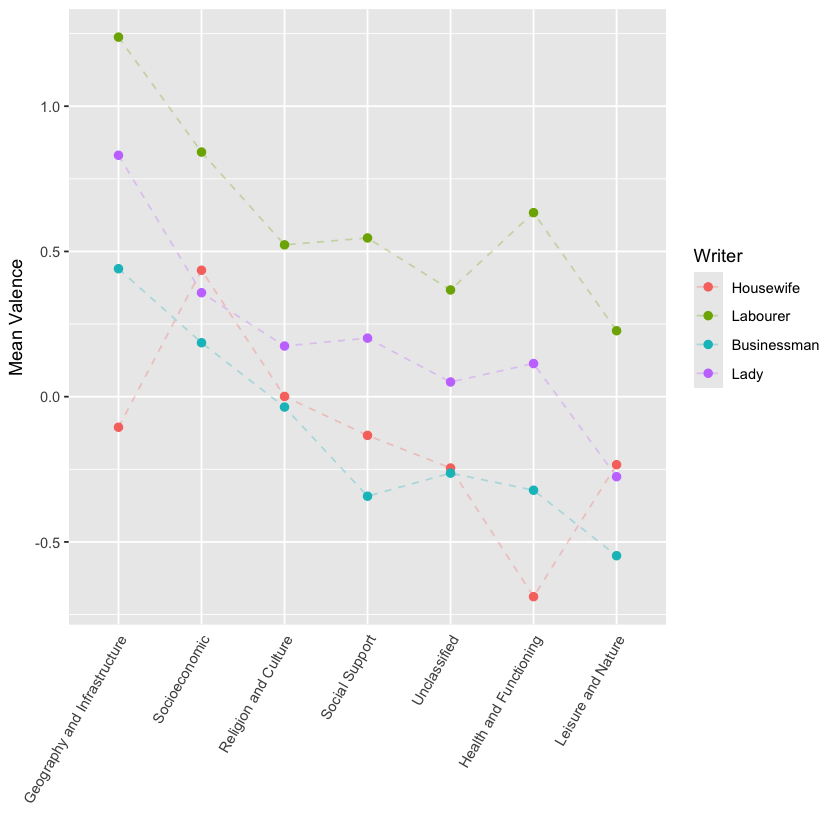

In [33]:
housewife <- nd  %>% 
mutate(docauthorid = "D0002") %>% 
mutate(authorLabel = "Housewife") %>% 
mutate(swbTopic = c("Unclassified",
                 "Socioeconomic", 
                 "Health and Functioning", 
                 "Social Support", 
                 "Religion and Culture", 
                 "Geography and Infrastructure", 
                 "Leisure and Nature"))

labourer <- nd  %>% 
mutate(docauthorid = "D0003")%>% 
mutate(authorLabel = "Labourer")%>% 
mutate(swbTopic = c("Unclassified",
                 "Socioeconomic", 
                 "Health and Functioning", 
                 "Social Support", 
                 "Religion and Culture", 
                 "Geography and Infrastructure", 
                 "Leisure and Nature"))

businessman <- nd  %>% 
mutate(docauthorid = "D0007") %>% 
mutate(authorLabel = "Businessman")%>% 
mutate(swbTopic = c("Unclassified",
                 "Socioeconomic", 
                 "Health and Functioning", 
                 "Social Support", 
                 "Religion and Culture", 
                 "Geography and Infrastructure", 
                 "Leisure and Nature"))

lady <- nd  %>% 
mutate(docauthorid = "D0009") %>% 
mutate(authorLabel = "Lady")%>% 
mutate(swbTopic = c("Unclassified",
                 "Socioeconomic", 
                 "Health and Functioning", 
                 "Social Support", 
                 "Religion and Culture", 
                 "Geography and Infrastructure", 
                 "Leisure and Nature"))

newdata <- rbind(housewife, labourer, businessman, lady)

# Means
f <-
  fitted(f3_valTopSWB_mis,
         newdata = newdata,
         probs = c(.05, .95)) %>% 
         data.frame() %>% 
         bind_cols(newdata)

#f <- f %>% filter(swbTopic!="Unclassified")

orderTopic <- c("Geography and Infrastructure",
                "Socioeconomic",
                "Religion and Culture",  
                "Social Support",
                "Unclassified", # Author mean when no discernible topic
                "Health and Functioning",
                "Leisure and Nature"
                )

orderAuthor <- c("Housewife", 
                "Labourer",
                "Businessman",
                "Lady")

p8  <- f %>%
  ggplot(aes(x = factor(swbTopic, orderTopic), y = Estimate, group = factor(authorLabel, orderAuthor), color = factor(authorLabel, orderAuthor))) +
#  geom_ribbon(aes(ymin = Q5, ymax = Q95, group = factor(authorLabel, orderAuthor), color = factor(authorLabel, orderAuthor), alpha=.1)) +
#  guides(alpha=FALSE)+
  geom_line(linetype="dashed", alpha = .3) +
geom_point(size=2) +
  #ggtitle("Mean valence by author and SWB theme") +
  theme(plot.title = element_text(size = 14, hjust = .5))+
theme(axis.text.x = element_text(angle = 60, vjust = 1, hjust=1))+
 xlab("")+ 
ylab("Mean Valence")+
  theme(axis.ticks.x = element_blank())+
labs(color = "Writer")#+
#geom_hline(yintercept = c(-0.24, .37, -.26, .05), colour = c('#F8766D','#7CAE00','#00BFC4','#C77CFF'), linetype = "dotted")
p8

ggsave("20250130_valTopSWB-randomMeans.jpg")


In [26]:
fitted(f3_valTopSWB_mis,
         newdata = newdata,
         probs = c(.15, .85), summary = TRUE) %>% 
         data.frame() %>% 
         bind_cols(newdata)

Estimate,Est.Error,Q15,Q85,SE,HF,SS,RC,GI,LN,docauthorid,authorLabel,swbTopic
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
-0.2455882032,0.4236157,-0.68613894,0.19363965,0,0,0,0,0,0,D0002,Housewife,Unclassified
0.4353430310,0.7368871,-0.26348551,1.18372282,1,0,0,0,0,0,D0002,Housewife,Socioeconomic
-0.6885466635,0.3211421,-1.01048196,-0.35242743,0,1,0,0,0,0,D0002,Housewife,Health and Functioning
-0.1332210927,0.2740779,-0.41677936,0.14263010,0,0,1,0,0,0,D0002,Housewife,Social Support
0.0008906092,1.2030010,-1.20915550,1.23191837,0,0,0,1,0,0,D0002,Housewife,Religion and Culture
-0.1051905050,0.1678959,-0.28438678,0.06947461,0,0,0,0,1,0,D0002,Housewife,Geography and Infrastructure
-0.2341848153,0.6953149,-0.95761076,0.46442136,0,0,0,0,0,1,D0002,Housewife,Leisure and Nature
0.3674229835,0.4934409,-0.15253704,0.86877562,0,0,0,0,0,0,D0003,Labourer,Unclassified
0.8421193299,0.6802244,0.16703171,1.50979380,1,0,0,0,0,0,D0003,Labourer,Socioeconomic


In [27]:
fitted(f3_valTopSWB_mis,
         newdata = newdata,
         probs = c(.05, .95), summary = TRUE) %>% 
         data.frame() %>% 
         bind_cols(newdata)

Estimate,Est.Error,Q5,Q95,SE,HF,SS,RC,GI,LN,docauthorid,authorLabel,swbTopic
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
-0.2455882032,0.4236157,-0.9627540,0.4458529,0,0,0,0,0,0,D0002,Housewife,Unclassified
0.4353430310,0.7368871,-0.6722801,1.7427090,1,0,0,0,0,0,D0002,Housewife,Socioeconomic
-0.6885466635,0.3211421,-1.2154668,-0.1612006,0,1,0,0,0,0,D0002,Housewife,Health and Functioning
-0.1332210927,0.2740779,-0.5875336,0.3195747,0,0,1,0,0,0,D0002,Housewife,Social Support
0.0008906092,1.2030010,-2.0073081,1.9491274,0,0,0,1,0,0,D0002,Housewife,Religion and Culture
-0.1051905050,0.1678959,-0.3774456,0.1673042,0,0,0,0,1,0,D0002,Housewife,Geography and Infrastructure
-0.2341848153,0.6953149,-1.3681086,0.8995304,0,0,0,0,0,1,D0002,Housewife,Leisure and Nature
0.3674229835,0.4934409,-0.4414440,1.1750110,0,0,0,0,0,0,D0003,Labourer,Unclassified
0.8421193299,0.6802244,-0.2645393,1.9221073,1,0,0,0,0,0,D0003,Labourer,Socioeconomic


In [9]:
write.csv(df, "20250130_PhD_DiaChk-RQ2a-FINAL.csv", row.names=FALSE)

$$\mathrm{R} = \begin{bmatrix}1&\rho_{01}&\rho_{02}&\rho_{03}&\rho_{04}&\rho_{05}&\rho_{06}&\rho_{07}&\rho_{08}&\rho_{09} \\ {\color{grey}\rho_{\color{grey}{01}}}&1&\rho_{12}&\rho_{13}&\rho_{14}&\rho_{15}&\rho_{16}&\rho_{17}&\rho_{18}&\rho_{19} \\ {\color{grey}\rho_{\color{grey}{02}}}& {\color{grey}\rho_{\color{grey}{12}}}&1&\rho_{23}&\rho_{24}&\rho_{25}&\rho_{26}&\rho_{27}&\rho_{28}&\rho_{29} \\  {\color{grey}\rho_{\color{grey}{03}}}&{\color{grey}\rho_{\color{grey}{13}}}&{\color{grey}\rho_{\color{grey}{23}}}&1&\rho_{34}&\rho_{35}&\rho_{36}&\rho_{37}&\rho_{38}&\rho_{39}  \\  {\color{grey}\rho_{\color{grey}{04}}}&{\color{grey}\rho_{\color{grey}{14}}}&{\color{grey}\rho_{\color{grey}{24}}}&{\color{grey}\rho_{\color{grey}{34}}}&1&\rho_{45}&\rho_{46}&\rho_{47}&\rho_{48}&\rho_{49}\\  {\color{grey}\rho_{\color{grey}{05}}}&{\color{grey}\rho_{\color{grey}{15}}}&{\color{grey}\rho_{\color{grey}{25}}}&{\color{grey}\rho_{\color{grey}{35}}}&{\color{grey}\rho_{\color{grey}{45}}}&1&\rho_{56}&\rho_{57}&\rho_{58}&\rho_{59} \\  {\color{grey}\rho_{\color{grey}{06}}}&{\color{grey}\rho_{\color{grey}{16}}}&{\color{grey}\rho_{\color{grey}{26}}}&{\color{grey}\rho_{\color{grey}{36}}}&{\color{grey}\rho_{\color{grey}{46}}}&{\color{grey}\rho_{\color{grey}{56}}}&1&\rho_{67}&\rho_{68}&\rho_{69} \\  {\color{grey}\rho_{\color{grey}{07}}}&{\color{grey}\rho_{\color{grey}{17}}}&{\color{grey}\rho_{\color{grey}{27}}}&{\color{grey}\rho_{\color{grey}{37}}}&{\color{grey}\rho_{\color{grey}{47}}}&{\color{grey}\rho_{\color{grey}{57}}}&{\color{grey}\rho_{\color{grey}{67}}}&1&\rho_{78}&\rho_{79} \\  {\color{grey}\rho_{\color{grey}{08}}}&{\color{grey}\rho_{\color{grey}{18}}}&{\color{grey}\rho_{\color{grey}{28}}}&{\color{grey}\rho_{\color{grey}{38}}}&{\color{grey}\rho_{\color{grey}{48}}}&{\color{grey}\rho_{\color{grey}{58}}}&{\color{grey}\rho_{\color{grey}{68}}}&{\color{grey}\rho_{\color{grey}{78}}}&1&\rho_{89} \\  {\color{grey}\rho_{\color{grey}{09}}}&{\color{grey}\rho_{\color{grey}{19}}}&{\color{grey}\rho_{\color{grey}{29}}}&{\color{grey}\rho_{\color{grey}{39}}}&{\color{grey}\rho_{\color{grey}{49}}}&{\color{grey}\rho_{\color{grey}{59}}}&{\color{grey}\rho_{\color{grey}{69}}}&{\color{grey}\rho_{\color{grey}{79}}}&{\color{grey}\rho_{\color{grey}{89}}}&1\end{bmatrix}$$